#**☕📈 Análise de Dados de Café**

Dataset fornece dados sobre produção, exportação, importação e consumo de café.

Os datasets foram disponibilizados no [Kaggle](https://www.kaggle.com/datasets/michals22/coffee-dataset?select=Coffee_import.csv) cuja a fonte é o site oficial da ICO : https://www.ico.org/new_historical.asp



**Objetivo desse projeto:**

* Entender como o mercado de comercialização do café evoluiu ao longo destes 30 anos analisados.

* Identificar oportunidades de crescimento na participação do Brasil no mercado do café.



## 🟠 Etapas de ETL 🟠

O que foi feito:

*1. Carregar os CSVs necessarios* ✅

*2. Transportar as tabelas (de wide para long)* ✅

*3. Corrigir nomes de países* ✅

*4. Mesclar com o dataframe de continentes* ✅

*5. Verificar paises se há paises sem contimentes associado* ✅

*6. Verificar outliers (nulos, negativos,...)* ✅


In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00


🟠 Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio  # configura o Plotly para renderizar como imagens estáticas para compatibilidade com GitHub

pio.renderers.default = 'png'  # para garantir que os graficos sejam plotados no github

🟠 Carregamento dos datasets

In [3]:
# dataset : Coffee Production
file_path = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_production.csv'
dfp = pd.read_csv(file_path, sep = ',', encoding='ISO-8859-1')
print(f"Coffee Production:")
display(dfp.head())

# Dataset com a lista de paises e continentes
file_path1 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Countries-Continents.csv'
df_continent = pd.read_csv(file_path1, sep = ',', encoding='ISO-8859-1')
print(f"\nContinentes")
display(df_continent.head())

# dataset : Coffee Export
file_path2 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_export.csv'
dfce =  pd.read_csv(file_path2, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Export")
display(dfce.head())


# dataset : Coffee Consumption
file_path3 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_domestic_consumption.csv'
dfcc = pd.read_csv(file_path3, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Consumption")
display(dfcc.head())

# dataset : Coffee Import
file_path4 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_import.csv'
dfci = pd.read_csv(file_path4, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Import")
display(dfci.head())

# dataset : Coffee Importers Consumption
file_path5 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_importers_consumption.csv'
dfcic = pd.read_csv(file_path5, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Importers Consumption")
display(dfcic.head())

# dataset : Coffee re export -- paises que importam café para exportar para outros países vizinhos
file_path6 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_re_export.csv'
dfcree = pd.read_csv(file_path6, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee re export")
display(dfcree.head())

Coffee Production:


,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09



Continentes


,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina



Coffee Export


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000



Coffee Consumption


,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000



Coffee Import


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000



Coffee Importers Consumption


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import_consumption
0,Austria,80400000,78120000,72720000,80100000,65160000,60720000,64560000,65220000,66300000,...,67020000,76140000,74940000,68100000,68160000,71580000,69720000,70320000,70380000,1904520000
1,Belgium,0,0,0,0,0,0,0,0,0,...,56040000,54900000,74700000,75540000,64440000,90120000,78000000,81900000,71100000,1460520000
2,Belgium/Luxembourg,67440000,42480000,41760000,47340000,57480000,64380000,62340000,53160000,78540000,...,0,0,0,0,0,0,0,0,0,514920000
3,Bulgaria,6120000,1020000,10500000,19620000,21180000,23580000,14760000,16500000,19440000,...,21600000,22560000,25140000,22560000,24360000,27120000,24900000,25560000,25380000,625080000
4,Croatia,0,0,8100000,7920000,9840000,17280000,18240000,21660000,19200000,...,22020000,21600000,23220000,22080000,22500000,22800000,21660000,21600000,22860000,564180000



Coffee re export


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_re_export
0,Austria,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,12600000,...,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,Belgium,0,0,0,0,0,0,0,0,0,...,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000
2,Belgium/Luxembourg,53460000,62280000,67860000,76440000,78240000,79680000,89220000,99480000,136200000,...,0,0,0,0,0,0,0,0,0,742860000
3,Bulgaria,9960000,10980000,420000,4200000,6600000,7320000,1560000,1140000,1080000,...,7320000,11040000,11460000,14640000,16500000,19620000,17520000,18720000,21720000,205620000
4,Croatia,0,0,2040000,1860000,1800000,1920000,1020000,1440000,1140000,...,1440000,1440000,1560000,3060000,3780000,5940000,4680000,5160000,5160000,57900000


🟠 **Transportar a Tabela de Produção**

*Transformamos o formato "wide" (anos como colunas) para "long" (uma coluna `Year`).*

1.    Loop ara os datasets que tenham a coluna de **Coffee Type**

In [4]:
# Lista de DataFrames para transpor
raw_dfs ={"production" : dfp,
          "coffee_consump" : dfcc}

# Lista de nomes das colunas de valor
col_names = {
    "production": "Production",  # Nome desejado para o valor de cada ano
    "coffee_consump": "Consumed"}


# Dicionário vazio para armazenar resultados
transposed_dfs = {}


for name, df in raw_dfs.items():
    df = df.iloc[:, :-1]  # Todas as linhas, todas as colunas exceto a última (que tem o total_*)
    # Transposição direta com pd.melt()
    transposed_df = pd.melt(
        df,                                  # considera todas as colunas menos a total_* (a ultuma)
        id_vars=["Country", "Coffee type"],  # Colunas fixas
        var_name="Year",                     # Nome da nova coluna de anos
        value_name=col_names[name])          # Nome da coluna de valores definida pela lista acima (Production, Exports)

    transposed_dfs[name] = transposed_df     # Salva no dicionário


# Acessar DataFrames transpostos
production = transposed_dfs["production"]
coffee_consump = transposed_dfs["coffee_consump"]

# Mostrar as primeiras linhas
print("Production transposta:")
display(production.head())

print("\nCoffee Consumption transposta:")
display(coffee_consump.head())

Production transposta:


,Country,Coffee type,Year,Production
0,Angola,Robusta/Arabica,1990/91,3.000000e+06
1,Bolivia (Plurinational State of),Arabica,1990/91,7.380000e+06
2,Brazil,Arabica/Robusta,1990/91,1.637160e+09
3,Burundi,Arabica/Robusta,1990/91,2.922000e+07
4,Ecuador,Arabica/Robusta,1990/91,9.024000e+07



Coffee Consumption transposta:


,Country,Coffee type,Year,Consumed
0,Angola,Robusta/Arabica,1990/91,1200000
1,Bolivia (Plurinational State of),Arabica,1990/91,1500000
2,Brazil,Arabica/Robusta,1990/91,492000000
3,Burundi,Arabica/Robusta,1990/91,120000
4,Ecuador,Arabica/Robusta,1990/91,21000000


2. Loop ara os datasets que tenham apenas coluna de **Country** e **colunas 1990-2019** apenas

    *   Coffee Export
    *   Coffee Import
    *   Coffee Importers Consumption





In [5]:
raw_dfs2 = {"coffee_export" : dfce,
            "coffee_import" : dfci,
            "coffee_imp_consump" : dfcic,
            "coffee_reexport" : dfcree}

# Lista de nomes para a coluna de valores
col_names2 = {
    "coffee_export": "Exported",
    "coffee_import": "Imported",
    "coffee_imp_consump": "Consumed_Imp",
    "coffee_reexport" : "Re_Exported"
}

dfs_transposed = {}

for name, df in raw_dfs2.items():
  df = df.iloc[:, :-1]  # Todas as linhas, todas as colunas exceto a última
  df_transposed = pd.melt(
      df,
      id_vars=['Country'],
      var_name='Year',
      value_name=col_names2[name])
  dfs_transposed[name] = df_transposed  # salva no dicionario dfs_transposed


# Acessar DataFrames transpostos
coffee_export = dfs_transposed["coffee_export"]
coffee_import = dfs_transposed["coffee_import"]
coffee_imp_consump = dfs_transposed["coffee_imp_consump"]
coffee_reexport = dfs_transposed["coffee_reexport"]

# Mostrar as primeiras linhas de cada df
print("Coffee Export transposta:")
display(coffee_export.head())

print("\nCoffee Import transposta:")
display(coffee_import.head())

print("\nCoffee Importers Consumption transposta:")
display(coffee_imp_consump.head())

print("\nCoffee re export transposta:")
display(coffee_reexport.head())

Coffee Export transposta:


,Country,Year,Exported
0,Angola,1990,5040000
1,Bolivia (Plurinational State of),1990,9360000
2,Brazil,1990,1016160000
3,Burundi,1990,35100000
4,Cameroon,1990,156660000



Coffee Import transposta:


,Country,Year,Imported
0,Austria,1990,112800000
1,Belgium,1990,0
2,Belgium/Luxembourg,1990,120900000
3,Bulgaria,1990,16080000
4,Croatia,1990,0



Coffee Importers Consumption transposta:


,Country,Year,Consumed_Imp
0,Austria,1990,80400000
1,Belgium,1990,0
2,Belgium/Luxembourg,1990,67440000
3,Bulgaria,1990,6120000
4,Croatia,1990,0



Coffee re export transposta:


,Country,Year,Re_Exported
0,Austria,1990,24900000
1,Belgium,1990,0
2,Belgium/Luxembourg,1990,53460000
3,Bulgaria,1990,9960000
4,Croatia,1990,0


🟠 **Padronizar nomes de países antes do merge com a tabela dimensão df_continent com as cinco tabelas fato**

* Coffee Production
* Coffee Domestic Consumption
* Coffee Export
* Coffee Import
* Coffee Importers Consumption
  




In [6]:

print("Production Countries:")
display(production['Country'].unique())

print("\nImport Consumption Countries:")
display(coffee_imp_consump['Country'].unique())

print("\nExport Countries:")
display(coffee_export['Country'].unique())

print("\nImport Countries:")
display(coffee_import['Country'].unique())

print("\nConsumption Countries:")
display(coffee_consump['Country'].unique())

print("\nRe Export Countries:")
display(coffee_reexport['Country'].unique())

Production Countries:


array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo',
       'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania',
       'Zambia', 'Cameroon', 'Central African Republic', 'Colombia',
       'Costa Rica', "CÃ´te d'Ivoire", 'Democratic Republic of Congo',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica',
       'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico',
       'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone',
       'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda',
       'Venezuela', 'Viet Nam', 'Yemen'], dtype=object)


Import Consumption Countries:


array(['   Austria', '   Belgium', '   Belgium/Luxembourg', '   Bulgaria',
       '   Croatia', '   Cyprus', '   Czechia', '   Denmark',
       '   Estonia', '   Finland', '   France', '   Germany', '   Greece',
       '   Hungary', '   Ireland', '   Italy', '   Latvia',
       '   Lithuania', '   Luxembourg', '   Malta', '   Netherlands',
       '   Poland', '   Portugal', '   Romania', '   Slovakia',
       '   Slovenia', '   Spain', '   Sweden', 'Japan', 'Norway',
       'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom',
       'United States of America'], dtype=object)


Export Countries:


array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', "CÃ´te d'Ivoire", 'Cuba',
       'Democratic Republic of Congo', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Kenya',
       "Lao People's Democratic Republic", 'Liberia', 'Madagascar',
       'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'Timor-Leste',
       'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam',
       'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)


Import Countries:


array(['   Austria', '   Belgium', '   Belgium/Luxembourg', '   Bulgaria',
       '   Croatia', '   Cyprus', '   Czechia', '   Denmark',
       '   Estonia', '   Finland', '   France', '   Germany', '   Greece',
       '   Hungary', '   Ireland', '   Italy', '   Latvia',
       '   Lithuania', '   Luxembourg', '   Malta', '   Netherlands',
       '   Poland', '   Portugal', '   Romania', '   Slovakia',
       '   Slovenia', '   Spain', '   Sweden', 'Japan', 'Norway',
       'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom',
       'United States of America'], dtype=object)


Consumption Countries:


array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo',
       'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania',
       'Zambia', 'Cameroon', 'Central African Republic', 'Colombia',
       'Costa Rica', "CÃ´te d'Ivoire", 'Democratic Republic of Congo',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica',
       'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico',
       'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone',
       'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda',
       'Venezuela', 'Viet Nam', 'Yemen'], dtype=object)


Re Export Countries:


array(['   Austria', '   Belgium', '   Belgium/Luxembourg', '   Bulgaria',
       '   Croatia', '   Cyprus', '   Czechia', '   Denmark',
       '   Estonia', '   Finland', '   France', '   Germany', '   Greece',
       '   Hungary', '   Ireland', '   Italy', '   Latvia',
       '   Lithuania', '   Luxembourg', '   Malta', '   Netherlands',
       '   Poland', '   Portugal', '   Romania', '   Slovakia',
       '   Slovenia', '   Spain', '   Sweden', 'Japan', 'Norway',
       'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom',
       'United States of America'], dtype=object)

Podemos notar que os df **Production, Export e Consumption Country** tem os mesmos paises que necessitam ser padronizados.

Já os df **Import e Imported Comsumption** será necessario remover os espaços antes e depois do nome do país.

In [7]:
name_upd = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}


for name, df in name_upd.items():
    df['Country'] = df['Country'].str.strip() # remove os espaços antes pra depois corrige o nome do pais

    df['Country'] = (df['Country']
                     .replace(
                              {"CÃ´te d'Ivoire": "Ivory Coast",
                              "Bolivia (Plurinational State of)": "Bolivia",
                              "Timor-Leste" : "East Timor",
                              "Viet Nam" : "Vietnam",
                              "Lao People's Democratic Republic" : "Laos",
                              "Democratic Republic of Congo" : "Congo",
                              "Trinidad & Tobago" : "Trinidad and Tobago",
                              "Belgium/Luxembourg" : "Luxembourg",
                              "Czechia" : "CZ",
                              "United States of America" : "US"
                              }))

    print(f"\n\n{name} padronizado:")
    display(df['Country'].unique())




production padronizado:


array(['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Ecuador', 'Indonesia',
       'Madagascar', 'Malawi', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Rwanda', 'East Timor', 'Zimbabwe', 'Congo', 'Cuba',
       'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania', 'Zambia',
       'Cameroon', 'Central African Republic', 'Colombia', 'Costa Rica',
       'Ivory Coast', 'El Salvador', 'Equatorial Guinea', 'Ethiopia',
       'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'India', 'Jamaica', 'Kenya', 'Laos', 'Liberia', 'Mexico', 'Nepal',
       'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka',
       'Thailand', 'Togo', 'Trinidad and Tobago', 'Uganda', 'Venezuela',
       'Vietnam', 'Yemen'], dtype=object)



coffee_export padronizado:


array(['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Cameroon',
       'Central African Republic', 'Colombia', 'Congo', 'Costa Rica',
       'Ivory Coast', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Kenya', 'Laos', 'Liberia', 'Madagascar',
       'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'East Timor',
       'Togo', 'Trinidad and Tobago', 'Uganda', 'Venezuela', 'Vietnam',
       'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)



coffee_consump padronizado:


array(['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Ecuador', 'Indonesia',
       'Madagascar', 'Malawi', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Rwanda', 'East Timor', 'Zimbabwe', 'Congo', 'Cuba',
       'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania', 'Zambia',
       'Cameroon', 'Central African Republic', 'Colombia', 'Costa Rica',
       'Ivory Coast', 'El Salvador', 'Equatorial Guinea', 'Ethiopia',
       'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'India', 'Jamaica', 'Kenya', 'Laos', 'Liberia', 'Mexico', 'Nepal',
       'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka',
       'Thailand', 'Togo', 'Trinidad and Tobago', 'Uganda', 'Venezuela',
       'Vietnam', 'Yemen'], dtype=object)



coffee_import padronizado:


array(['Austria', 'Belgium', 'Luxembourg', 'Bulgaria', 'Croatia',
       'Cyprus', 'CZ', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan',
       'Norway', 'Russian Federation', 'Switzerland', 'Tunisia',
       'United Kingdom', 'US'], dtype=object)



coffee_imp_consump padronizado:


array(['Austria', 'Belgium', 'Luxembourg', 'Bulgaria', 'Croatia',
       'Cyprus', 'CZ', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan',
       'Norway', 'Russian Federation', 'Switzerland', 'Tunisia',
       'United Kingdom', 'US'], dtype=object)



coffee_reexport padronizado:


array(['Austria', 'Belgium', 'Luxembourg', 'Bulgaria', 'Croatia',
       'Cyprus', 'CZ', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan',
       'Norway', 'Russian Federation', 'Switzerland', 'Tunisia',
       'United Kingdom', 'US'], dtype=object)

‼️**Belgium/Luxembourg** foi substituido por Luxembourg visto que se tornou um país independente da Belgica desde a Revolução Belga de 1830–1831. Logo como são nações indenpendentes, não é coerente unificá-las como um só país.

-----------------------------

‼️ No arquivo de country-continent.csv **Czechia está nomeada como CZ** e **United States of America está nomeada como apenas US**.
Portanto, para padronizar esses dois paises ao df_continent, ambos os paises foram ajustados para que o continente seja associado corretamente a esses dois paises.



🟠 **Mesclar com o dataframe de continentes e verificar paises sem contimentes associado**

In [8]:
to_merge = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}

for name, df in to_merge.items():
  to_merge[name] = pd.merge(
      df,
      df_continent,
      on='Country',
      how='left')

  print(f"\n\n{name} merged:")
  display(to_merge[name].head())



production merged:


,Country,Coffee type,Year,Production,Continent
0,Angola,Robusta/Arabica,1990/91,3.000000e+06,Africa
1,Bolivia,Arabica,1990/91,7.380000e+06,South America
2,Brazil,Arabica/Robusta,1990/91,1.637160e+09,South America
3,Burundi,Arabica/Robusta,1990/91,2.922000e+07,Africa
4,Ecuador,Arabica/Robusta,1990/91,9.024000e+07,South America




coffee_export merged:


,Country,Year,Exported,Continent
0,Angola,1990,5040000,Africa
1,Bolivia,1990,9360000,South America
2,Brazil,1990,1016160000,South America
3,Burundi,1990,35100000,Africa
4,Cameroon,1990,156660000,Africa




coffee_consump merged:


,Country,Coffee type,Year,Consumed,Continent
0,Angola,Robusta/Arabica,1990/91,1200000,Africa
1,Bolivia,Arabica,1990/91,1500000,South America
2,Brazil,Arabica/Robusta,1990/91,492000000,South America
3,Burundi,Arabica/Robusta,1990/91,120000,Africa
4,Ecuador,Arabica/Robusta,1990/91,21000000,South America




coffee_import merged:


,Country,Year,Imported,Continent
0,Austria,1990,112800000,Europe
1,Belgium,1990,0,Europe
2,Luxembourg,1990,120900000,Europe
3,Bulgaria,1990,16080000,Europe
4,Croatia,1990,0,Europe




coffee_imp_consump merged:


,Country,Year,Consumed_Imp,Continent
0,Austria,1990,80400000,Europe
1,Belgium,1990,0,Europe
2,Luxembourg,1990,67440000,Europe
3,Bulgaria,1990,6120000,Europe
4,Croatia,1990,0,Europe




coffee_reexport merged:


,Country,Year,Re_Exported,Continent
0,Austria,1990,24900000,Europe
1,Belgium,1990,0,Europe
2,Luxembourg,1990,53460000,Europe
3,Bulgaria,1990,9960000,Europe
4,Croatia,1990,0,Europe


‼️ É preciso atualizar os dataframes originais (production, coffee_export,...) pois não são alterados automaticamente.

In [9]:
# atualizando os dataframes originais com a coluna continente

production = to_merge["production"]
coffee_export = to_merge["coffee_export"]
coffee_consump = to_merge["coffee_consump"]
coffee_import = to_merge["coffee_import"]
coffee_imp_consump = to_merge["coffee_imp_consump"]
coffee_reexport = to_merge["coffee_reexport"]

#teste:
production.head()

,Country,Coffee type,Year,Production,Continent
0,Angola,Robusta/Arabica,1990/91,3.000000e+06,Africa
1,Bolivia,Arabica,1990/91,7.380000e+06,South America
2,Brazil,Arabica/Robusta,1990/91,1.637160e+09,South America
3,Burundi,Arabica/Robusta,1990/91,2.922000e+07,Africa
4,Ecuador,Arabica/Robusta,1990/91,9.024000e+07,South America


🟠 Verificar se há países sem continentes associados

In [10]:
# loop para verificar países que não tiveram correspondência no merge
no_continent = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}


for name, df in no_continent.items():
  empty_continent_countries = df[df['Continent'].isna()]['Country'].unique()

  print(f"Número de países sem continente: {len(empty_continent_countries)}")
  print(f"Países sem continente: {empty_continent_countries.tolist()}")
  if len(empty_continent_countries) > 0:
    print(f"Dataframe onde estão os paises sem continente: {name}\n")
  else:
      print("Não há dataframes com países sem continente associado.\n")


Número de países sem continente: 0
Países sem continente: []
Não há dataframes com países sem continente associado.

Número de países sem continente: 0
Países sem continente: []
Não há dataframes com países sem continente associado.

Número de países sem continente: 0
Países sem continente: []
Não há dataframes com países sem continente associado.

Número de países sem continente: 0
Países sem continente: []
Não há dataframes com países sem continente associado.

Número de países sem continente: 0
Países sem continente: []
Não há dataframes com países sem continente associado.

Número de países sem continente: 0
Países sem continente: []
Não há dataframes com países sem continente associado.



🟠 Verificação de valores nulos

In [11]:
# loop para verificar valores nulos:
dfs = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}


for name, df in dfs.items():
  print(f"\n\n{name} nulos:")
  display(df.isna().sum())



production nulos:


,0
Country,0
Coffee type,0
Year,0
Production,0
Continent,0




coffee_export nulos:


,0
Country,0
Year,0
Exported,0
Continent,0




coffee_consump nulos:


,0
Country,0
Coffee type,0
Year,0
Consumed,0
Continent,0




coffee_import nulos:


,0
Country,0
Year,0
Imported,0
Continent,0




coffee_imp_consump nulos:


,0
Country,0
Year,0
Consumed_Imp,0
Continent,0




coffee_reexport nulos:


,0
Country,0
Year,0
Re_Exported,0
Continent,0


✅**Não há valores nulos em nenhum dos df**

🟠 Verificar os tipos de cada coluna

In [12]:
for name, df in dfs.items():
  print(f"\n\n{name} tipos de coluna:")
  display(df.dtypes)



production tipos de coluna:


,0
Country,object
Coffee type,object
Year,object
Production,float64
Continent,object




coffee_export tipos de coluna:


,0
Country,object
Year,object
Exported,int64
Continent,object




coffee_consump tipos de coluna:


,0
Country,object
Coffee type,object
Year,object
Consumed,int64
Continent,object




coffee_import tipos de coluna:


,0
Country,object
Year,object
Imported,int64
Continent,object




coffee_imp_consump tipos de coluna:


,0
Country,object
Year,object
Consumed_Imp,int64
Continent,object




coffee_reexport tipos de coluna:


,0
Country,object
Year,object
Re_Exported,int64
Continent,object


🟠 **Transformar as colunas**

 > *Production, Exported, Imported, Consumed e Consumed_Imp ➡ float64*

 >  *Year ➡ int64*

In [13]:
# 1. Float --> Production, Exported, Imported, Consumed e Consumed_Imp

col_float = ["Production", "Exported", "Imported", "Consumed", "Consumed_Imp", "Re_Exported"]

for name, df in dfs.items():
    for col in col_float:
        if col in df.columns:  # Verifica se a coluna existe no DataFrame atual
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Converte para float, tratando erros

    print(f"\nTipos de coluna após conversão do DataFrame: {name}")
    display(df.dtypes)



Tipos de coluna após conversão do DataFrame: production


,0
Country,object
Coffee type,object
Year,object
Production,float64
Continent,object



Tipos de coluna após conversão do DataFrame: coffee_export


,0
Country,object
Year,object
Exported,int64
Continent,object



Tipos de coluna após conversão do DataFrame: coffee_consump


,0
Country,object
Coffee type,object
Year,object
Consumed,int64
Continent,object



Tipos de coluna após conversão do DataFrame: coffee_import


,0
Country,object
Year,object
Imported,int64
Continent,object



Tipos de coluna após conversão do DataFrame: coffee_imp_consump


,0
Country,object
Year,object
Consumed_Imp,int64
Continent,object



Tipos de coluna após conversão do DataFrame: coffee_reexport


,0
Country,object
Year,object
Re_Exported,int64
Continent,object


‼️ Criei uma nova coluna chamada "Year_clean" pois a coluna Year do dataframe Prodcution e Consumption é dado por temporada o que pode afetar posteriormente analises temporais.

Pelo fato da coluna 'Year' ser medir a temporada de produção de café que pode ser entre anos optei por deixar a coluna com os dados originais e adicionar a coluna apenas com o ano base caso necessario para analises posteriores.

In [14]:
# # 2. Year --> int (menos a do dataframe )
year_col = {"production": production,
            "coffee_consump" : coffee_consump}

for name, df in year_col.items():
    if 'Year' in df.columns:
        df['Year_clean'] = (df["Year"]
                            .str
                            .split("/")
                            .str[0]
                            .astype(int)
                            )
    print(f"\nTipos da coluna 'Year_clen' após conversão do DataFrame: {name}")
    display(df.dtypes)


Tipos da coluna 'Year_clen' após conversão do DataFrame: production


,0
Country,object
Coffee type,object
Year,object
Production,float64
Continent,object
Year_clean,int64



Tipos da coluna 'Year_clen' após conversão do DataFrame: coffee_consump


,0
Country,object
Coffee type,object
Year,object
Consumed,int64
Continent,object
Year_clean,int64


In [15]:
year_col2 = {"coffee_export": coffee_export,
            "coffee_import" : coffee_import,
            "coffee_imp_consump" : coffee_imp_consump}

for name, df in year_col2.items():
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
    print(f"\nTipos da coluna 'Year_clen' após conversão do DataFrame: {name}")
    display(df.dtypes)



Tipos da coluna 'Year_clen' após conversão do DataFrame: coffee_export


,0
Country,object
Year,int64
Exported,int64
Continent,object



Tipos da coluna 'Year_clen' após conversão do DataFrame: coffee_import


,0
Country,object
Year,int64
Imported,int64
Continent,object



Tipos da coluna 'Year_clen' após conversão do DataFrame: coffee_imp_consump


,0
Country,object
Year,int64
Consumed_Imp,int64
Continent,object


🟠 **Verificar valores negativos**

> *rapidamente observado antes de transpor os dataframes que o Brasil tem valores negativos na coluna de produção de café em alguns anos.*

In [16]:
dfs_col = {"production" : "Production",
          "coffee_consump": "Consumed",
          "coffee_export": "Exported",
          "coffee_import": "Imported",
          "coffee_imp_consump": "Consumed_Imp",
           "coffee_reexport" : "Re_Exported"}

for name, df in dfs.items():
  col_name = dfs_col[name]
  if col_name in df.columns:
    negativos_count = (df[col_name] < 0).sum()
    print(f"\nTotal de valores negativos no dataframe {name}: {negativos_count}")
  else:
      print(f"Não há valores nulos no dataframe {name}")



Total de valores negativos no dataframe production: 0

Total de valores negativos no dataframe coffee_export: 3

Total de valores negativos no dataframe coffee_consump: 0

Total de valores negativos no dataframe coffee_import: 0

Total de valores negativos no dataframe coffee_imp_consump: 0

Total de valores negativos no dataframe coffee_reexport: 0


  * Descobrindo qual pais tem valor negativo:

In [17]:
coffee_export[coffee_export['Exported'] < 0]

,Country,Year,Exported,Continent
1322,Brazil,2014,-2147483648,South America
1377,Brazil,2015,-2147483648,South America
1597,Brazil,2019,-2147483648,South America



> ‼️ **Os valores negativos do Brasil serão substituídos pela mediana.**

*Optou-se pela mediana ao invés da média porque, em conjuntos de dados assimétricos ou com erros extremos, como é o caso, ela é mais robusta. Diferentemente da média, a mediana não é influenciada por valores atípicos, que podem ocorrer dado que estamos analisando agricultura e picos de produção/exportação podem ocorrer exporaticamente.*

Desta forma, a confiabilidade da análise é preservada.

In [18]:
# Filtrando apenas dados do Brasil
brasil_data = coffee_export[coffee_export['Country'] == 'Brazil'].copy()

# Calculando a mediana global dos valores positivos do Brasil
valores_positivos = brasil_data[brasil_data['Exported'] > 0]['Exported']
mediana_global = np.nanmedian(valores_positivos)

# Substituindo os valores negativos pela mediana global
brasil_data.loc[brasil_data['Exported'] < 0, 'Exported'] = mediana_global

# Atualizando o DataFrame original
coffee_export.update(brasil_data)

# Verificando se ainda há valores negativos ou NaNs
print("Valores negativos remanescentes:",
      (coffee_export[coffee_export['Country'] == 'Brazil']['Exported'] < 0).sum())
print("NaNs remanescentes:",
      coffee_export[coffee_export['Country'] == 'Brazil']['Exported'].isna().sum())
# Verificando o valor da mediana
print(f"Mediana global das exportações do Brasil (valores positivos): {mediana_global:,.0f}")

# Visualizando os dados do Brasil corrigidos
display(coffee_export[coffee_export['Country']=='Brazil'])

Valores negativos remanescentes: 0
NaNs remanescentes: 0
Mediana global das exportações do Brasil (valores positivos): 1,571,880,000


,Country,Year,Exported,Continent
2,Brazil,1990,1016160000,South America
57,Brazil,1991,1270980000,South America
112,Brazil,1992,1127460000,South America
167,Brazil,1993,1070280000,South America
222,Brazil,1994,1036380000,South America
277,Brazil,1995,868080000,South America
332,Brazil,1996,915060000,South America
387,Brazil,1997,1008060000,South America
442,Brazil,1998,1088640000,South America
497,Brazil,1999,1388940000,South America


--------

# 🟠 Visualização de Outliers através do gráfico Boxplot


1. Os 6 Maiores Exportadores de Café (1990-2019)

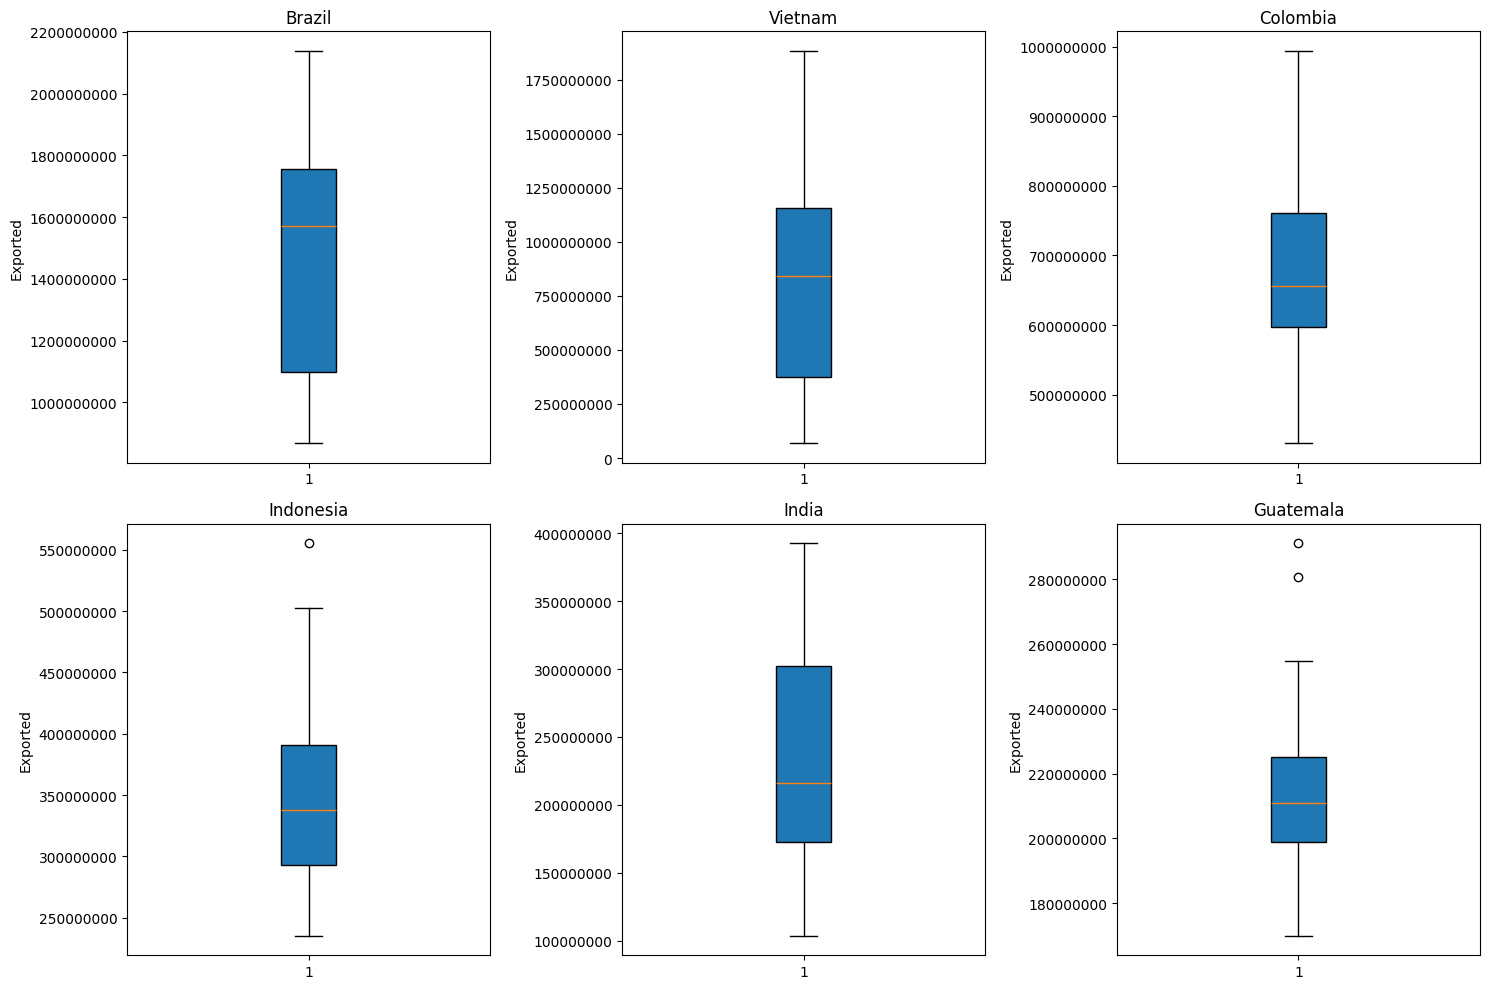

In [19]:
# 1. Calcular o total de exportações por país
total_export = coffee_export.groupby('Country')['Exported'].sum()

# 2. Pegar os 5 maiores exportadores
top6_countries = total_export.nlargest(6).index.tolist()

# 3. Filtrar apenas os dados dos top 5 países
top5_data = coffee_export[coffee_export['Country'].isin(top6_countries)]

# 4. Criar a figura
plt.figure(figsize=(15, 10))

# 5. Plotar cada país
for i, country in enumerate(top6_countries, 1):
    plt.subplot(2, 3, i)  # 2 linhas, 3 colunas

    # Filtrar dados do país específico
    country_data = top5_data[top5_data['Country'] == country]['Exported']

    # Boxplot
    plt.boxplot(country_data, patch_artist=True)
    plt.title(country)
    plt.ylabel('Exported')

    # Formatar eixos para números grandes
    plt.ticklabel_format(style='plain', axis='y')

# 6. Ajustar layout e remover quadro vazio se necessário
plt.tight_layout()
if len(top6_countries) == 7:  # Remove o 6º quadro vazio
    plt.delaxes(plt.gcf().get_axes()[-1])

plt.show()

# ‼️

**Indonesia tem um outlier**


> Importante analisar para entender se há necessidade ou não de tratá-lo

Outlier detectado na Indonésia no ano 2013: 555,300,000
Limite superior para outliers: 539,062,500

Media de exportação da Indonesia (com outlier): 353,598,000
Media de exportação da Indonesia (sem outlier): 346,642,759
Impacto percentual da média de exportação da Indonesia: 1.97%



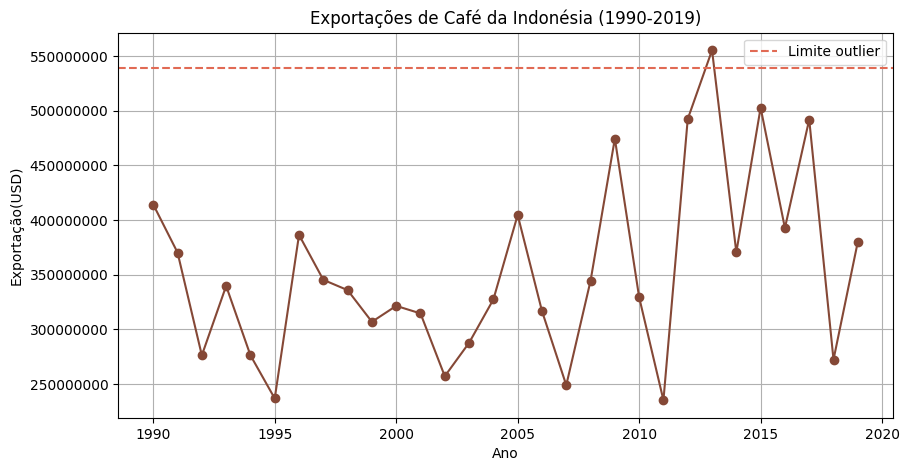

In [20]:
# Filtrar dados da Indonésia
indonesia_data = coffee_export[coffee_export['Country'] == 'Indonesia']['Exported']

# Calcular Q1, Q3 e IQR
q1 = indonesia_data.quantile(0.25)
q3 = indonesia_data.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Identificar outliers
outliers = indonesia_data[indonesia_data > limite_superior]


# Pegar o primeiro outlier (mais extremo)
outlier_ano = coffee_export.loc[outliers.index[0], 'Year']
outlier_valor = outliers.iloc[0]

print(f"Outlier detectado na Indonésia no ano {outlier_ano}: {outlier_valor:,.0f}")
print(f"Limite superior para outliers: {limite_superior:,.0f}\n")
print(f"Media de exportação da Indonesia (com outlier): {indonesia_data.mean():,.0f}")

med_sem_outlier = indonesia_data[indonesia_data <= limite_superior].mean()
print(f"Media de exportação da Indonesia (sem outlier): {med_sem_outlier:,.0f}")

print(f"Impacto percentual da média de exportação da Indonesia: {((indonesia_data.mean() - med_sem_outlier) / indonesia_data.mean() * 100):.2f}%\n")

# Visualizar o comportamento da exportação da Indonésia ao longo dos anos
plt.figure(figsize=(10, 5))
plt.plot(coffee_export[coffee_export['Country'] == 'Indonesia']['Year'],
             coffee_export[coffee_export['Country'] == 'Indonesia']['Exported'],
             marker='o', color='#854836')
plt.axhline(y=limite_superior, color='#E16A54', linestyle='--', label='Limite outlier')
plt.title('Exportações de Café da Indonésia (1990-2019)')
plt.ylabel('Exportação(USD)')
plt.xlabel('Ano')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

**Escolha do tratamento adequado do outlier da Indonésia:**

- Ano: 2013
- Valor original: 555,300,000
- Limite superior calculado: 539,062,500
- Impacto na análise: Houve um impacto na média de exportações do país de 2% neste ano podendo ser um ano atípico cuja a safra teve um aumento de produção dada a boas condições climaticas daquele ano.

✅ **Decisão: Outlier Mantido**

# ‼️

**Guatemala tem dois outliers**


> Importante analisar para entender se há necessidade ou não de tratá-lo

Outliers detectados na Guatemala nos anos [1999; 2000] : [280,860,000; 291,120,000]
Limite superior para outliers: 264,195,000

Media de exportação da Guatemala (com outliers): 215,478,000
Media de exportação da Guatemala (sem outliers): 210,441,429
Impacto percentual da média de exportação da Guatemala: 2.34%



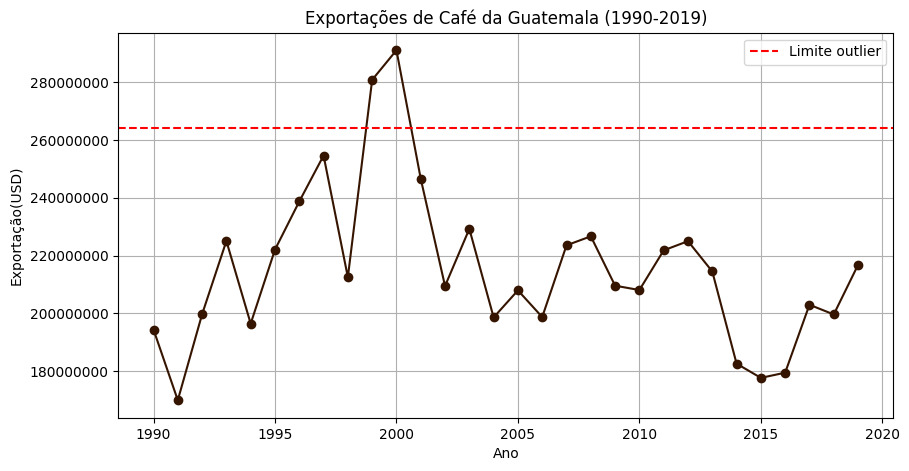

In [21]:
# Filtrar apenas os dados da Guatemala
guatemala_data = coffee_export[coffee_export['Country'] == 'Guatemala']['Exported']

# Calcular Q1, Q3 e IQR
q1 = guatemala_data.quantile(0.25)
q3 = guatemala_data.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Identificar outliers
outliers = guatemala_data[guatemala_data > limite_superior]


# Pegar o primeiro outlier
outlier_ano = coffee_export.loc[outliers.index[0], 'Year']
outlier_valor = outliers.iloc[0]

# Pegar o segundo outlier
outlier_ano2 = coffee_export.loc[outliers.index[1], 'Year']
outlier_valor2 = outliers.iloc[1]

print(f"Outliers detectados na Guatemala nos anos [{outlier_ano}; {outlier_ano2}] : [{outlier_valor:,.0f}; {outlier_valor2:,.0f}]")
print(f"Limite superior para outliers: {limite_superior:,.0f}\n")
print(f"Media de exportação da Guatemala (com outliers): {guatemala_data.mean():,.0f}")


med_sem_outliers = guatemala_data[guatemala_data <= limite_superior].mean()
print(f"Media de exportação da Guatemala (sem outliers): {med_sem_outliers:,.0f}")

print(f"Impacto percentual da média de exportação da Guatemala: {((guatemala_data.mean() - med_sem_outliers) / guatemala_data.mean() * 100):.2f}%\n")

# Visualizar os dados da Guatemala
plt.figure(figsize=(10, 5))
plt.plot(coffee_export[coffee_export['Country'] == 'Guatemala']['Year'],
             coffee_export[coffee_export['Country'] == 'Guatemala']['Exported'],
             marker='o', color='#361500')
plt.axhline(y=limite_superior, color='r', linestyle='--', label='Limite outlier')
plt.title('Exportações de Café da Guatemala (1990-2019)')
plt.ylabel('Exportação(USD)')
plt.xlabel('Ano')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

**Escolha do tratamento adequado do outlier da Guatemala:**

- Ano: 1999
- Valor original: 555,300,000
- Limite superior calculado: 539,062,500
- Impacto na análise: Ambos outliers impactaram a média de exportações do país em 2.37% apenas nestes anos, podendo ter sido causado por um ano atípico cuja a safra teve um aumento de produção dada a boas condições climaticas daquele ano.

✅ **Decisão: Outliers Mantidos**

-----------------------

🟠 **Analisando o describe e quantas linhas e colunas de cada df**

In [22]:
for name, df in dfs.items():
  print(f"\n\nResumo estatistico de {name}")
  display(df.describe().round(0))



Resumo estatistico de production


,Production,Year_clean
count,1.650000e+03,1650.0
mean,1.368090e+08,2004.0
std,3.911303e+08,9.0
min,0.000000e+00,1990.0
25%,2.280000e+06,1997.0
50%,2.103000e+07,2004.0
75%,9.264000e+07,2012.0
max,3.907860e+09,2019.0




Resumo estatistico de coffee_export


,Year,Exported
count,1650.0,1.650000e+03
mean,2004.0,1.018069e+08
std,9.0,2.607256e+08
min,1990.0,0.000000e+00
25%,1997.0,1.080000e+06
50%,2004.0,8.970000e+06
75%,2012.0,8.199000e+07
max,2019.0,2.138220e+09




Resumo estatistico de coffee_consump


,Consumed,Year_clean
count,1.650000e+03,1650.0
mean,3.708289e+07,2004.0
std,1.331194e+08,9.0
min,0.000000e+00,1990.0
25%,2.400000e+05,1997.0
50%,3.330000e+06,2004.0
75%,1.950000e+07,2012.0
max,1.332000e+09,2019.0




Resumo estatistico de coffee_import


,Year,Imported
count,1050.0,1.050000e+03
mean,2004.0,1.689898e+08
std,9.0,2.984960e+08
min,1990.0,0.000000e+00
25%,1997.0,1.632000e+07
50%,2004.0,5.397000e+07
75%,2012.0,1.847100e+08
max,2019.0,1.851240e+09




Resumo estatistico de coffee_imp_consump


,Year,Consumed_Imp
count,1050.0,1.050000e+03
mean,2004.0,1.250999e+08
std,9.0,2.348742e+08
min,1990.0,0.000000e+00
25%,1997.0,1.234500e+07
50%,2004.0,4.485000e+07
75%,2012.0,1.160250e+08
max,2019.0,1.638600e+09




Resumo estatistico de coffee_reexport


,Re_Exported
count,1050.0
mean,43492800.0
std,100633450.0
min,0.0
25%,1020000.0
50%,8220000.0
75%,38520000.0
max,828060000.0


In [23]:
# verificando o numero de linas e colunas de cada df
for name, df in dfs.items():
  print(f"{name}")
  display(df.shape)


production


(1650, 6)

coffee_export


(1650, 4)

coffee_consump


(1650, 6)

coffee_import


(1050, 4)

coffee_imp_consump


(1050, 4)

coffee_reexport


(1050, 4)

> **Algumas observações sobre o resumo estatístico :**

*adicionar observações*

# **🟠 Análise Exploratória dos Dados**

# 1. Análise da Taxa Média de Exportação dos 10 maiores Produtores de Café

> **Objetivo** --> Identificar os maiores produtores e a taxa media de exportação de cada um
* Top 10 países em produção/exportação
* Taxa Media de Exportação (%) de cada um ao longo 1990-2019

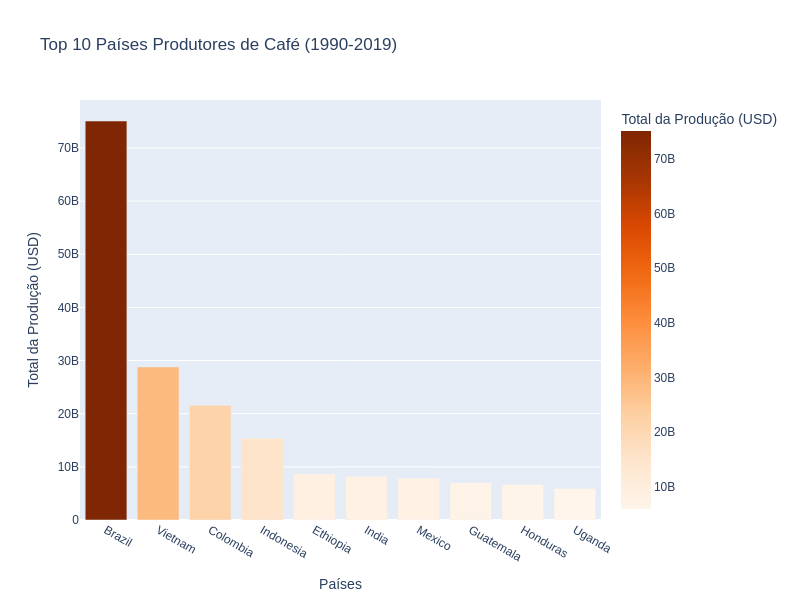

In [24]:
# top10 paises produtores de café:
top10_prod = (production.groupby(['Country','Continent'])['Production']
              .sum()
              .reset_index()
              .sort_values(by='Production', ascending=False)
              .head(10))

# visualização - grafico de barras:
fig_prod = px.bar(
    top10_prod,
    x='Country',
    y='Production',
    labels={"Country": "Países",     # rotulo do eixo x
            "Production": "Total da Produção (USD)"}, # rotulo do eixo y
    title='Top 10 Países Produtores de Café (1990-2019)',
    width=800, height=600,
    color='Production', # Mapeia cores aos valores (gradiente)
    #showlegend=False, # Remove a legenda
    color_continuous_scale=px.colors.sequential.Oranges) # Gradiente marrom/laranja)

fig_prod.show()

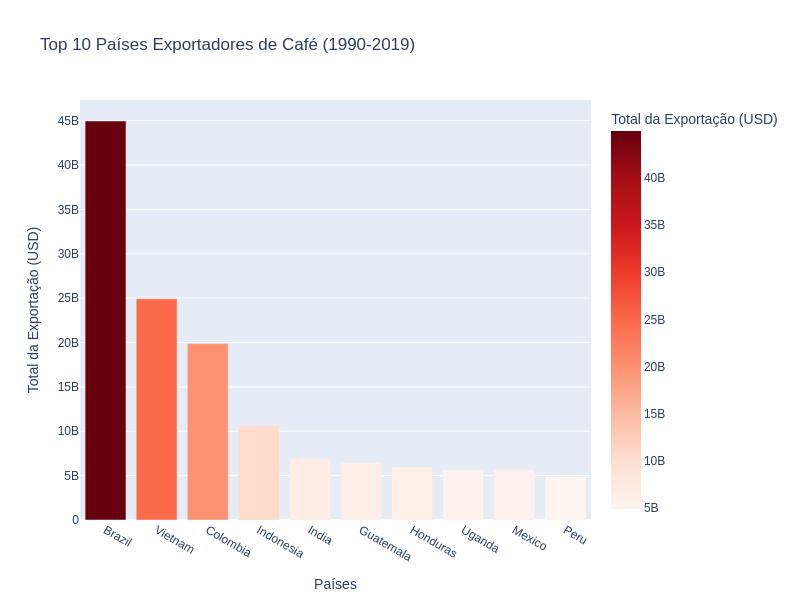

In [25]:
# top10 paises exportadores de café:
top10_exp = (coffee_export.groupby(['Country','Continent'])['Exported']
              .sum()
              .reset_index()
              .sort_values(by='Exported', ascending=False)
              .head(10))

# visualização - grafico de barras:
fig_exp = px.bar(
    top10_exp,
    x='Country',
    y='Exported',
    labels={"Country": "Países",     # rotulo do eixo x
            "Exported": "Total da Exportação (USD)"}, # rotulo do eixo y
    title='Top 10 Países Exportadores de Café (1990-2019)',
    width=800, height=600,
    color='Exported', # Mapeia cores aos valores (gradiente)
    color_continuous_scale=px.colors.sequential.Reds)

fig_exp.show()

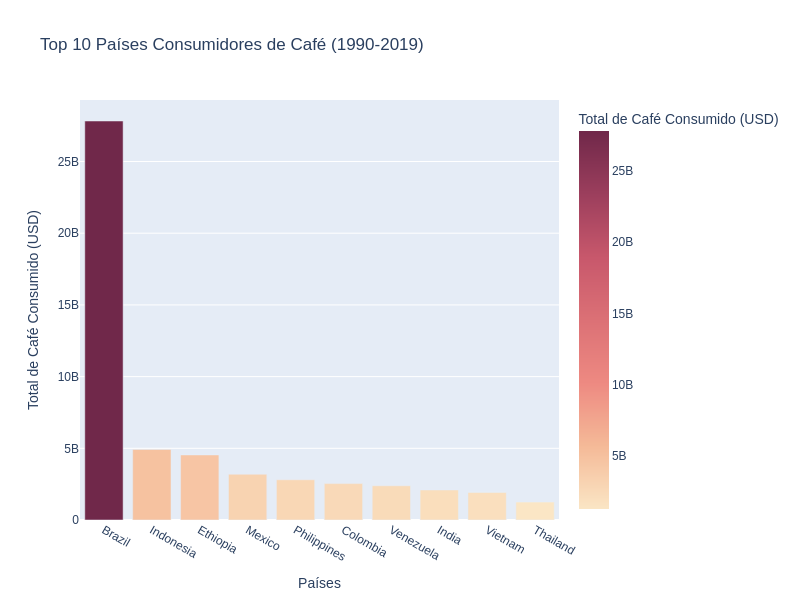

In [26]:
# top10 paises consumidores de café:
top10_consump = (coffee_consump.groupby(['Country','Continent'])['Consumed']
              .sum()
              .reset_index()
              .sort_values(by='Consumed', ascending=False)
              .head(10))

# visualização - grafico de barras:
fig_con = px.bar(
    top10_consump,
    x='Country',
    y='Consumed',
    labels={"Country": "Países",                    # rotulo do eixo x
            "Consumed": "Total de Café Consumido (USD)"}, # rotulo do eixo y
    title='Top 10 Países Consumidores de Café (1990-2019)',
    width=800, height=600,
    color='Consumed', # Mapeia cores aos valores (gradiente)
    color_continuous_scale=px.colors.sequential.Burgyl)

fig_con.show()

*** Taxa Média de Exportação (%) dos 10 maiores produtores de Café**

Onde:
> **Taxa de Exportação % (ano a ano) = ( (Exportado / Produzido) ) * 100**


In [27]:
production_year_clean = (production.groupby(['Country', 'Coffee type','Year_clean'])['Production']
                         .sum()
                         .reset_index()
                         .sort_values(by='Production', ascending=False)
                          )

top10_paises = top10_prod['Country'].unique()

production_year_clean = production_year_clean[production_year_clean['Country'].isin(top10_paises)]

production_year_clean

df_anual = (pd.merge(
    production_year_clean,
    coffee_export,
    left_on=['Country', 'Year_clean'],  # chaves do dataframe da esquerda (production)
    right_on =['Country', 'Year'],      # chaves do dataframe da direita (coffee_export)
    how='left'))


# Taxa Ano a Ano
df_anual['Tx_Exportacao'] = (df_anual['Exported'] / df_anual['Production']) * 100
df_anual

,Country,Coffee type,Year_clean,Production,Year,Exported,Continent,Tx_Exportacao
0,Brazil,Arabica/Robusta,2018,3.907860e+09,2018,2138220000,South America,54.715880
1,Brazil,Arabica/Robusta,2019,3.492660e+09,2019,1571880000,South America,45.005240
2,Brazil,Arabica/Robusta,2016,3.407280e+09,2016,2056140000,South America,60.345496
3,Brazil,Arabica/Robusta,2010,3.325680e+09,2010,1990020000,South America,59.837988
4,Brazil,Arabica/Robusta,2012,3.325080e+09,2012,1712940000,South America,51.515753
...,...,...,...,...,...,...,...,...
295,Honduras,Arabica,1993,1.097400e+08,1993,102300000,Central America,93.220339
296,Ethiopia,Arabica,1992,1.095000e+08,1992,44040000,Africa,40.219178
297,Honduras,Arabica,1990,9.408000e+07,1990,104100000,Central America,110.650510
298,Vietnam,Robusta/Arabica,1991,8.628000e+07,1991,72060000,Asia,83.518776


* Verificação se há algum país com taxa maior que 100% indicando exportação de estoques.

In [28]:
# ocorrencias de taxa de exportacao > producao:
df_anual[df_anual['Tx_Exportacao'] > 100]

,Country,Coffee type,Year_clean,Production,Year,Exported,Continent,Tx_Exportacao
25,Vietnam,Robusta/Arabica,2018,1.816980e+09,2018,1883100000,Asia,103.639005
30,Vietnam,Robusta/Arabica,2016,1.669140e+09,2016,1783260000,Asia,106.837054
44,Vietnam,Robusta/Arabica,2007,9.843000e+08,2007,1076160000,Asia,109.332521
46,Colombia,Arabica,1992,8.968200e+08,1992,993840000,South America,110.818224
50,Vietnam,Robusta/Arabica,2004,8.622000e+08,2004,891540000,Asia,103.402923
57,Vietnam,Robusta/Arabica,2001,7.855800e+08,2001,846360000,Asia,107.736959
71,Vietnam,Robusta/Arabica,2002,6.944400e+08,2002,706260000,Asia,101.702091
75,Colombia,Arabica,1993,6.853200e+08,1993,814080000,South America,118.788303
79,Colombia,Arabica,1998,6.520800e+08,1998,675600000,South America,103.606919
86,Colombia,Arabica,1999,5.707200e+08,1999,599700000,South America,105.077796


Observação:

> **Exportação > Produção (Tx > 100%)** --> países como o **Vietnam**, onde tiveram taxa de exportação maior que 100% pode ocorrer caso o país exportou estoques acumulados.

**Para fins de analise, tratarei esses casos com um limite máximo de 100%.**

In [29]:
# adicionando um clip level maximo de 100% para exported > production:

df_anual['Tx_Exportacao'] = df_anual['Tx_Exportacao'].clip(0, 100).round(1)
df_anual

,Country,Coffee type,Year_clean,Production,Year,Exported,Continent,Tx_Exportacao
0,Brazil,Arabica/Robusta,2018,3.907860e+09,2018,2138220000,South America,54.7
1,Brazil,Arabica/Robusta,2019,3.492660e+09,2019,1571880000,South America,45.0
2,Brazil,Arabica/Robusta,2016,3.407280e+09,2016,2056140000,South America,60.3
3,Brazil,Arabica/Robusta,2010,3.325680e+09,2010,1990020000,South America,59.8
4,Brazil,Arabica/Robusta,2012,3.325080e+09,2012,1712940000,South America,51.5
...,...,...,...,...,...,...,...,...
295,Honduras,Arabica,1993,1.097400e+08,1993,102300000,Central America,93.2
296,Ethiopia,Arabica,1992,1.095000e+08,1992,44040000,Africa,40.2
297,Honduras,Arabica,1990,9.408000e+07,1990,104100000,Central America,100.0
298,Vietnam,Robusta/Arabica,1991,8.628000e+07,1991,72060000,Asia,83.5


* Verificando se há algum país com taxa de exportação NaN:


In [30]:
df_anual.isna().sum()

,0
Country,0
Coffee type,0
Year_clean,0
Production,0
Year,0
Exported,0
Continent,0
Tx_Exportacao,0


>**Taxa Média de Exportação (%)** = media de cada país ao longo dos 30 anos analisados.

In [31]:
# Média da taxa de exportacao de cada país
tx_media = (df_anual.groupby(['Country', 'Continent','Coffee type'])['Tx_Exportacao']
            .mean()
            .reset_index()
            .sort_values(by=['Continent','Tx_Exportacao'], ascending=[False,False])
            )

tx_media.round(2)

,Country,Continent,Coffee type,Tx_Exportacao
1,Colombia,South America,Arabica,90.62
0,Brazil,South America,Arabica/Robusta,61.66
7,Mexico,North America,Arabica/Robusta,71.34
3,Guatemala,Central America,Arabica/Robusta,91.27
4,Honduras,Central America,Arabica,87.45
9,Vietnam,Asia,Robusta/Arabica,84.78
5,India,Asia,Robusta/Arabica,80.77
6,Indonesia,Asia,Robusta/Arabica,70.44
8,Uganda,Africa,Robusta/Arabica,91.43
2,Ethiopia,Africa,Arabica,48.14


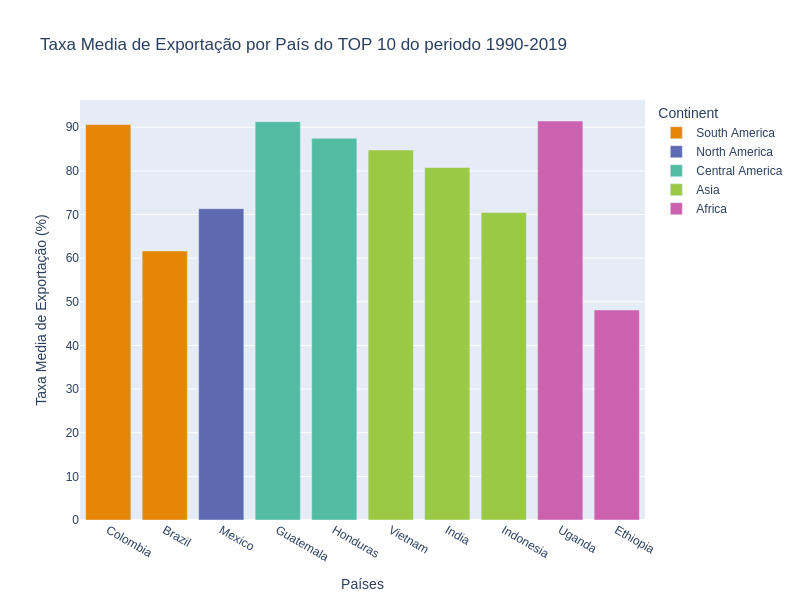

In [32]:
# Visualização -- grafico de barras:
fig_txme = px.bar(
    tx_media,
    x='Country',
    y='Tx_Exportacao',
    labels={"Country": "Países",                              # rotulo do eixo x
            "Tx_Exportacao": "Taxa Media de Exportação (%)"}, # rotulo do eixo y
    title='Taxa Media de Exportação por País do TOP 10 do periodo 1990-2019',
    width=800, height=600,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hover_data=['Tx_Exportacao'])

fig_txme.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do país
                 "Taxa Media de Exportação (%): %{y:,.0f}%")  # Formatação personalizada

fig_txme.show()

# **Insights relevantes sobre a produção e taxa de exportação de cada produtor**

América do Sul:
> **Brasil e Colômbia** -->
Ambos têm forte cultura de consumo de café, mas adotam estratégias distintas.
* **Colômbia:** Exporta **>90%** da produção, focando no café Arábica, mais valorizado no mercado externo, que está cotado a 459,44 USD/saca(60kg), isto é, **35% mais caro** que o café Arábica/Robusta produzido no Brasil [(CEPEA, 2025)](https://www.cepea.org.br/br/indicador/cafe.aspx).
* **Brasil:** Retém 39% para o mercado interno, produzindo Arábica/Robusta *(menos valorizado que o Arábica puro)*, equilibrando exportação e consumo doméstico.


América Central:
> **Honduras e Guatemala**
 * Exportam **>90%** da produção, dependendo fortemente do mercado externo.
 * São vulneráveis a desastres climáticos (furacões, secas), que impactam diretamente a agricultura e a economia local [(Open Democracy, 2020)](https://www.opendemocracy.net/pt/relatorio-sobre-mudancas-climaticas-america-central).


Ásia:
> **Vietnã, India e Indonésia**
* Líderes em produção, exportam **>80%** (*principalmente Robusta, menos valorizado*).
* o **Vietnã** é o maior exportador de Robusta do mundo, com **95%** da produção vendida externamente.
* Consumo interno abaixo de 20%, refletindo prioridade no comércio global.

África:
> **Uganda e Etiópia**
* **Uganda** exporta 95% (*foco em Robusta, menos valorizado*),
* **Etiópia** (*berço do café*) mantém 50% para consumo local, preservando a tradição do consumo no país.


-----
# **2. Análise do Consumo Interno dos 10 Maiores Importadores de Café**

>**Objetivo**: Identificar os países que consomem todo o café que importam e quais países equilibram consumo interno e a re-exportação do café importado:
* **Consumers** = países que consomem todo o café que importam
* **Hubs de exportação** = países que re-exportam parte do café importado



In [33]:
# Merge dos dados de importacao e consumo dos importado:
df_import_consump = pd.merge(coffee_import[['Country','Year','Imported']],
                             coffee_imp_consump[['Country', 'Year', 'Consumed_Imp','Continent']],
                             on=['Country', 'Year'],
                             how='inner')

# Cálculo da dependência
df_import_consump['Dep_imp_perc'] = ( df_import_consump['Consumed_Imp'] / df_import_consump['Imported'] ) * 100

# Substituir por 0 casos que houveram divisoes por 0 que resulta NaN
if df_import_consump['Dep_imp_perc'].isna().any():
    df_import_consump['Dep_imp_perc'].fillna(0, inplace=True)

# Substituir por 0 casos que o Consumed_Imp for 0 resultando 'inf'
if (df_import_consump['Consumed_Imp'] == 0).any():
    df_import_consump.loc[df_import_consump['Consumed_Imp'] == 0, 'Dep_imp_perc'] = 0


df_import_consump.sort_values(by='Imported', ascending=False)

<ipython-input-33-b411f59e41ab>:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Country,Year,Imported,Consumed_Imp,Continent,Dep_imp_perc
1109,US,2019,1851240000,1638600000,North America,88.513645
1035,US,2017,1769280000,1570980000,North America,88.792051
1072,US,2018,1735080000,1590840000,North America,91.686839
998,US,2016,1730280000,1514580000,North America,87.533810
961,US,2015,1662480000,1466280000,North America,88.198354
...,...,...,...,...,...,...
779,Luxembourg,2011,0,0,Europe,0.000000
17,Latvia,1990,0,0,Europe,0.000000
9,Estonia,1990,0,0,Europe,0.000000
5,Croatia,1990,0,0,Europe,0.000000


In [34]:
# Média da taxa de consumo interno por país
tx_dep = (df_import_consump.groupby(['Country', 'Continent'])['Dep_imp_perc']
            .mean()
            .reset_index()
            .sort_values(by=['Dep_imp_perc'], ascending=[False])
            )
tx_dep['Tx_Rexport'] = 100 - tx_dep['Dep_imp_perc'] # Taxa de reexportação

tx_dep.round(2)

,Country,Continent,Dep_imp_perc,Tx_Rexport
18,Luxembourg,Europe,inf,-inf
31,Tunisia,Africa,99.32,0.68
21,Norway,Europe,98.76,1.24
15,Japan,Asia,98.34,1.66
24,Romania,Europe,97.66,2.34
19,Malta,Europe,96.05,3.95
5,Cyprus,Europe,94.03,5.97
32,US,North America,89.42,10.58
8,Finland,Europe,87.43,12.57
11,Greece,Europe,87.38,12.62


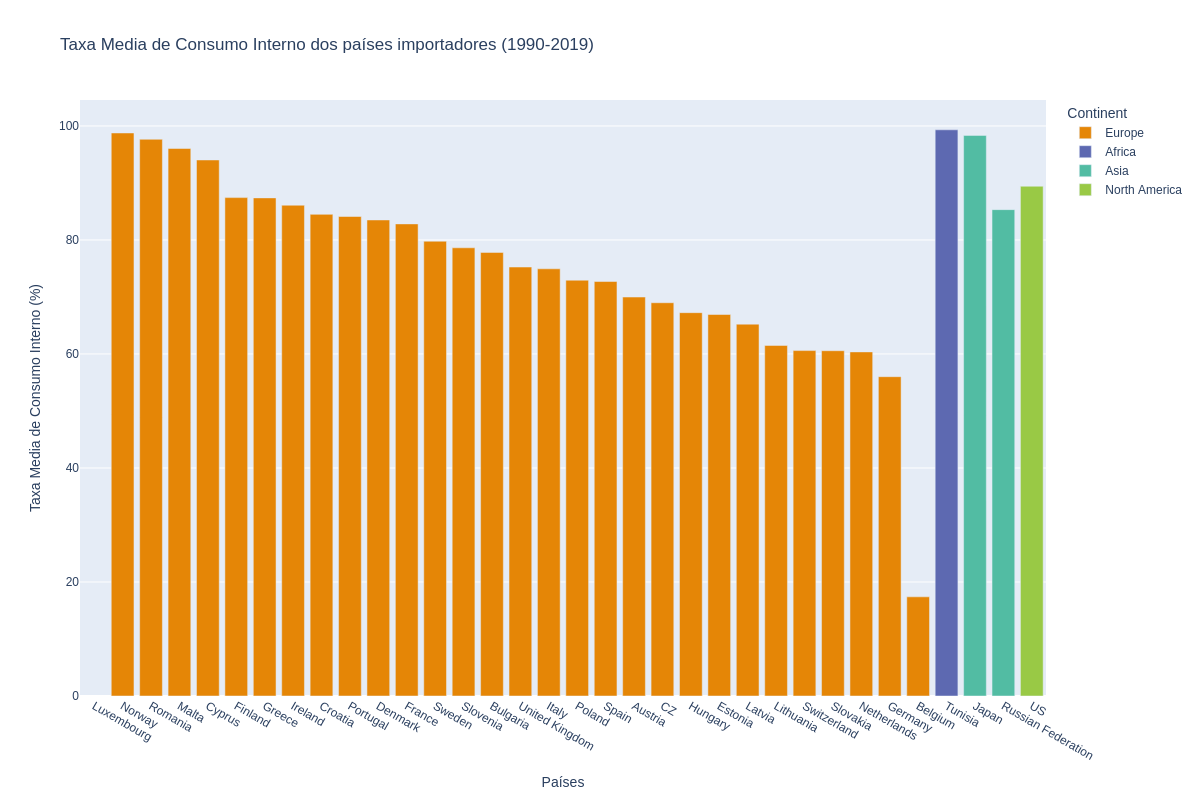

In [35]:
# Visualização -- grafico de barras:
fig_dep = px.bar(
    tx_dep,
    x='Country',
    y='Dep_imp_perc',
    labels={"Country": "Países",                    # rotulo do eixo x
            "Dep_imp_perc": "Taxa Media de Consumo Interno (%)"}, # rotulo do eixo y
    title='Taxa Media de Consumo Interno dos países importadores (1990-2019)',
    width=1200, height=800,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid)

fig_dep.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do país
                 "Taxa Media de Consumo Interno (%): %{y:,.0f}%")  # Formatação personalizada

fig_dep.show()

Dividindo os paises em duas categorias :
* Hub --> países que revendem uma parcela do que importa
* consumers --> países que consomem no mercado interno tudo que foi importado


In [36]:
rexp = (coffee_reexport.groupby(['Country','Continent'])['Re_Exported']
        .sum()
        .reset_index()
        .sort_values(by='Re_Exported', ascending=False)

)

# merge de coffee_reexport com tx_dep
re_exp = pd.merge(
    rexp[['Country', 'Continent','Re_Exported']],
    tx_dep[['Country','Tx_Rexport','Dep_imp_perc']],
    on=['Country'],
    how='inner')

# Identificar hubs (importam >120% do consumo - com excente de 20% considerando estoques acumulados)
re_exp["Category"] = ["Hub" if x >= 15 else "Consumer" for x in re_exp["Tx_Rexport"]]

re_exp.sort_values(by='Tx_Rexport', ascending=False)

,Country,Continent,Re_Exported,Tx_Rexport,Dep_imp_perc,Category
1,Belgium,Europe,4779780000,82.605612,17.394388,Hub
0,Germany,Europe,14558880000,43.987218,56.012782,Hub
4,Netherlands,Europe,2527200000,39.637521,60.362479,Hub
16,Slovakia,Europe,373020000,39.431770,60.568230,Hub
9,Switzerland,Europe,1485780000,39.406244,60.593756,Hub
22,Lithuania,Europe,184500000,38.505920,61.494080,Hub
26,Latvia,Europe,79380000,34.773221,65.226779,Hub
25,Estonia,Europe,93240000,33.078067,66.921933,Hub
15,Hungary,Europe,436740000,32.757077,67.242923,Hub
12,CZ,Europe,674640000,31.015083,68.984917,Hub


In [37]:
# tratando o inf de Luxembourg
re_exp['Tx_Rexport'] = re_exp['Tx_Rexport'].replace([np.inf, -np.inf], 0)
re_exp['Dep_imp_perc'] = re_exp['Dep_imp_perc'].replace([np.inf, -np.inf], 0)

re_exp.sort_values(by='Tx_Rexport', ascending=False)

,Country,Continent,Re_Exported,Tx_Rexport,Dep_imp_perc,Category
1,Belgium,Europe,4779780000,82.605612,17.394388,Hub
0,Germany,Europe,14558880000,43.987218,56.012782,Hub
4,Netherlands,Europe,2527200000,39.637521,60.362479,Hub
16,Slovakia,Europe,373020000,39.431770,60.568230,Hub
9,Switzerland,Europe,1485780000,39.406244,60.593756,Hub
22,Lithuania,Europe,184500000,38.505920,61.494080,Hub
26,Latvia,Europe,79380000,34.773221,65.226779,Hub
25,Estonia,Europe,93240000,33.078067,66.921933,Hub
15,Hungary,Europe,436740000,32.757077,67.242923,Hub
12,CZ,Europe,674640000,31.015083,68.984917,Hub


> Hubs --> paises que exportam o café que importa.

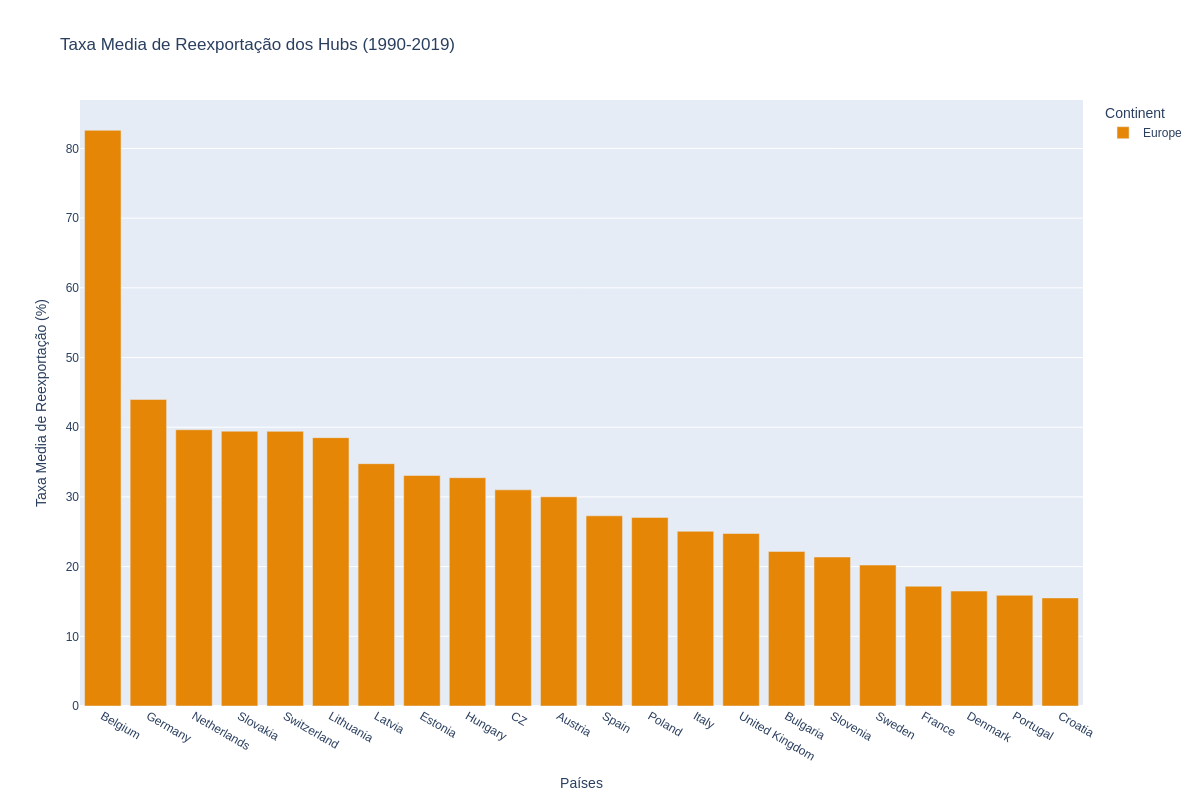

In [38]:
# Considerando apenas paises Hubs
hub_countries = re_exp[re_exp['Category'] == 'Hub'].sort_values(by='Tx_Rexport', ascending=False)

# Visualização -- grafico de barras:
fig_reexp = px.bar(
    hub_countries,
    x='Country',
    y='Tx_Rexport',
    labels={"Country": "Países",                             # rotulo do eixo x
            "Tx_Rexport": "Taxa Media de Reexportação (%)"}, # rotulo do eixo y
    title='Taxa Media de Reexportação dos Hubs (1990-2019)',
    width=1200, height=800,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid)

fig_reexp.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do país
                 "Taxa Media de Reexportação (%): %{y:,.0f}%")  # Formatação personalizada


fig_reexp.show()

> Consumers --> Paises que consomem todo o café que importam

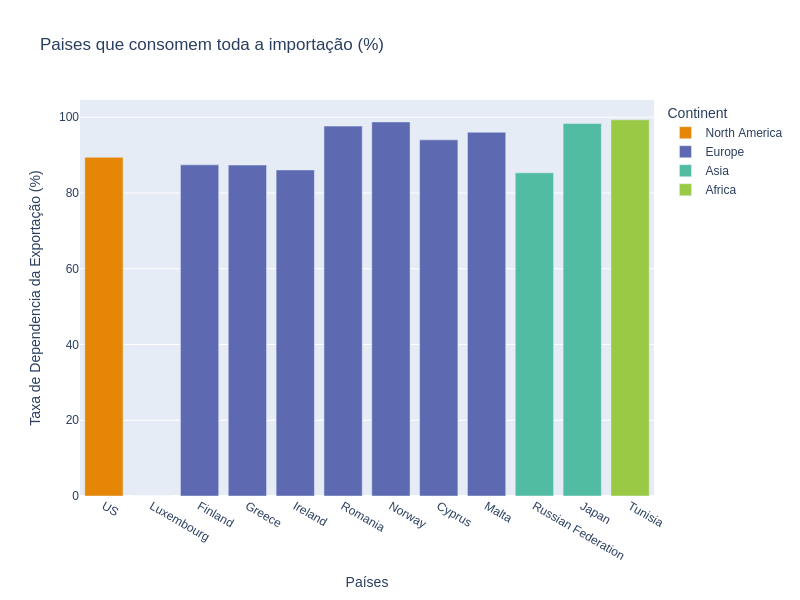

In [39]:
cons_countries = re_exp[re_exp['Category'] == 'Consumer']

# Visualização -- grafico de barras:
fig_reexp2 = px.bar(
    cons_countries,
    x='Country',
    y='Dep_imp_perc',
    labels={"Country": "Países",                               # rotulo do eixo x
            "Dep_imp_perc": "Taxa de Dependencia da Exportação (%)"}, # rotulo do eixo y
    title='Paises que consomem toda a importação (%)',
    width=800, height=600,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid)

fig_reexp2.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do país
                 "Taxa de Dependencia da Exportação (%): %{y:,.0f}%")  # Formatação personalizada

fig_reexp2.show()

# **Insights interssantes:**

>Países como **Bélgica, Países Baixos e Alemanha** são hubs de exportação que importam café e reexportam para outros mercados.
* A **Bélgica** tem uma **taxa de exportação superior a 80%**, indicando que o consumo interno de café é baixo e **sua prioridade é o comércio externo** dentro do continente europeu. Porém, o volume importado é consideravelmente abaixo comparado à **Alemanha**.
* A **Alemanha**, por outro lado, é **um dos principais hubs de exportação de café** da Europa no que se refere ao volume importado, mas grande parte é consumida internamente, mostrando um **equilíbrio entre o mercado interno e externo**.

✅ Vantagens:

  * Gerar receita com logistica e empregos no setor portuário
  * Diversificação Economica reduzindo a dependencia de outros setores

❌ Desvantagens:

  * Vulneráveis a crises climáticas nos países produtores causando queda na produção e, consequentemente, na importação.
  * Flutuação de preços e aumento de tarifas
  * Dependencia dos países produtores, como Brasil e Vietnã, decidirem ou precisarem reduzir exportações, o hub perde receita.

> Paises como **Portugal, Russia, Japão e Estados Unidos** são países que consomem no mercado interno toda sua importação mas também estão sujeitos a:

* Dependência de importação: 100% do consumo.
* Risco: Aumento de preços em crises de oferta
---

**👁️ Oportunidade para o Brasil:**

O novo pacote de tarifas alfandegárias imposto pelos EUA (conhecido como "tarifaço") pode acelerar a assinatura do Acordo Mercosul-UE, o que beneficiaria o Brasil, maior produtor mundial de café, na expansão de suas vendas para os hubs de reexportação europeus. A Bélgica, um dos principais hub da Europa, já registrou um aumento de **150%** nas importações de café brasileiro [(Canal Rural, 2025)](https://www.canalrural.com.br/agricultura/cafe-do-es-na-europa-exportacoes-disparam-150-e-atingem-41-milhoes-de-sacas/). Com o acordo, o país teria vantagens para negociar tarifas reduzidas para, por exemplo, cafés especiais, ampliando assim suas margens de lucro.

Além disso, as novas tarifas norte-americanas aumentaram substancialmente as taxas de exportação para diversos países. No caso do café, embora o produto brasileiro seja taxado em **10%**, outros fornecedores enfrentam tarifas significativamente mais altas: a **Suíça**, um dos maiores reexportadores de café da Europa, sofre uma taxa de **31%**, enquanto o **Vietnã**, segundo maior produtor e exportador mundial, foi taxado em **46%**. [(BBC, 2025)](https://www.bbc.com/portuguese/articles/c99px3d2p9ro)

Esta diferença tarifária coloca o Brasil em posição vantajosa para expandir suas vendas não apenas no mercado europeu, mas também no norte-americano, onde pode ganhar ainda mais espaço diante da menor competitividade de outros exportadores.


----------------
# **3. Análise Temporal**

Objetivo:
> **A) Produção Total por Ano**

Foco: Top 10 países produtores (1990–2019)

Análises:

1. Tendência geral: a produção global aumentou ou diminuiu ao longo dos 30 anos analisados?
2. Países que mais cresceram/reduziram produção



1. **Tendência geral: a produção global aumentou ou diminuiu entre os 10 maiores produtores?**

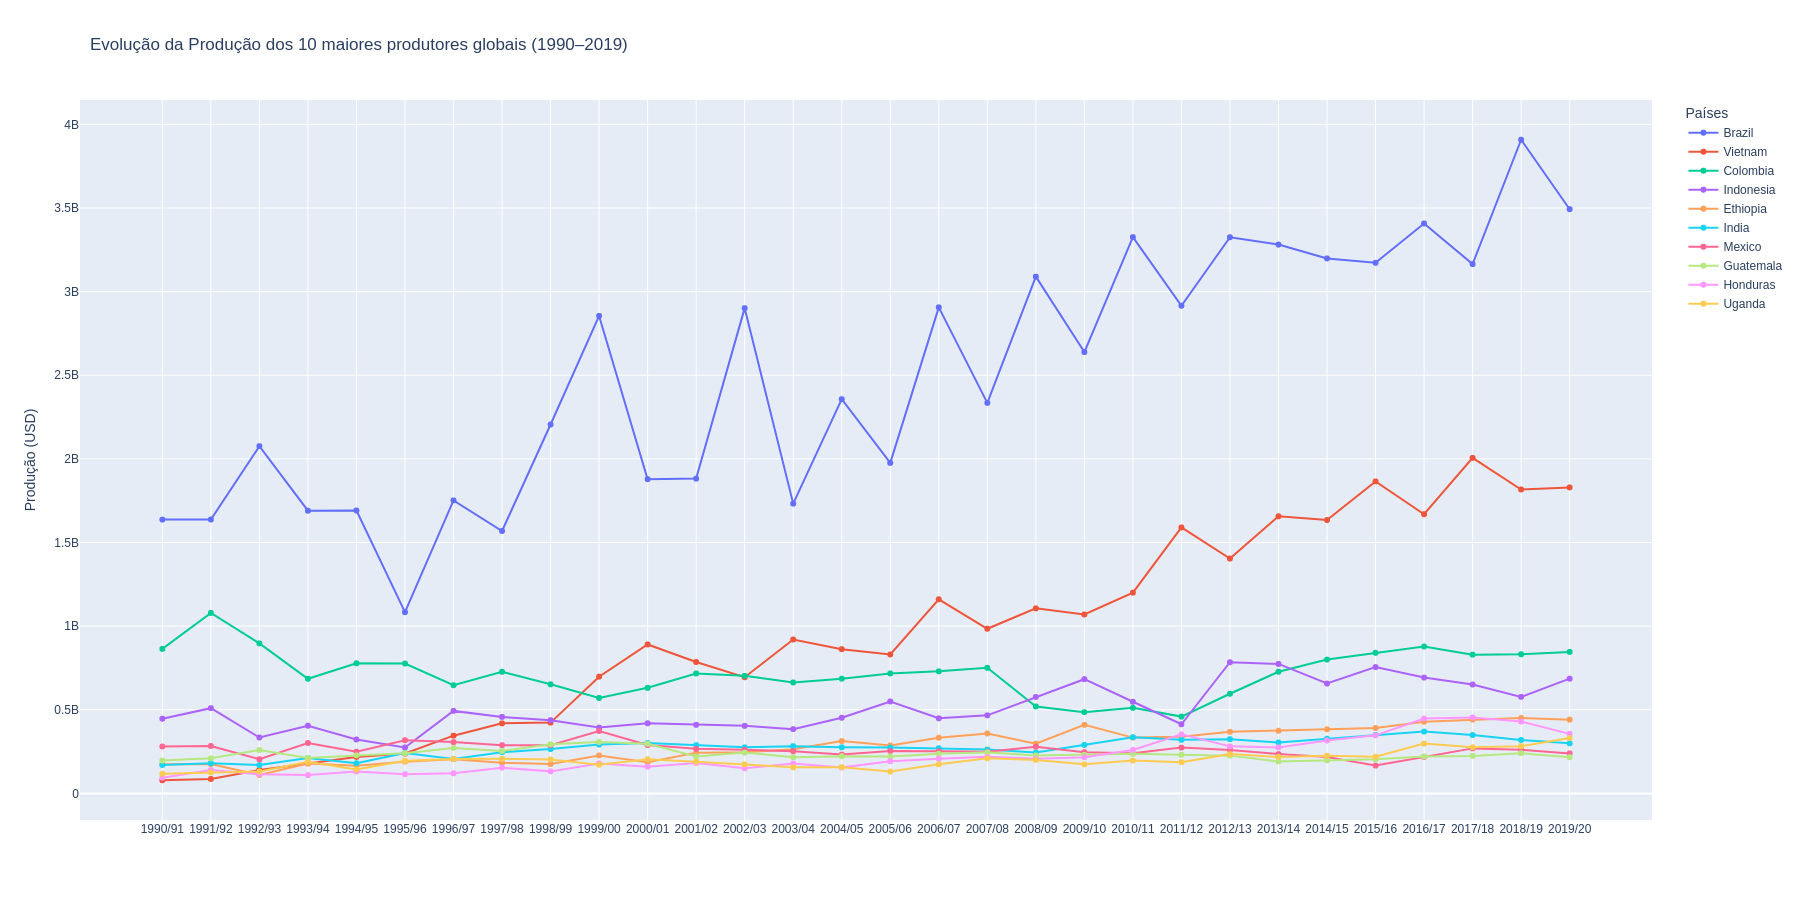

In [40]:
# grafico de linhas -- evolução da produção anual de cada pais

# agrupando valores por ano safra:
top_producers = (production.groupby(['Country', 'Coffee type','Year'])['Production']
                         .sum()
                         .reset_index()
                         .sort_values(by='Production', ascending=False))

# selecionando apenas o top 10
top_producers = top_producers[top_producers['Country'].isin(top10_paises)]

# orderando o dataframe por ano-safra:
top_producers = top_producers.sort_values('Year')

fig_top_prod = px.line(
              top_producers.sort_values('Year'),  # garantir ordem cronológica
              x='Year',
              y='Production',
              labels={"Year": "",
                     "Production": "Produção (USD)",
                      "Country" : "Países"},
              title='Evolução da Produção dos 10 maiores produtores globais (1990–2019)',
              category_orders={"Country": top10_prod['Country']},  # ordem da legenda dos paises por produção total
              color='Country',
              width=1800, height=900,
              line_shape='linear',
              markers=True)

fig_top_prod.show()


**2. Países que aumentaram/reduziram sua produção**
* Variação Percentual Total (1990–2019)
  * Fórmula = ( (Produção 2019 - Produção 1990) / Produção 1990 ) * 100



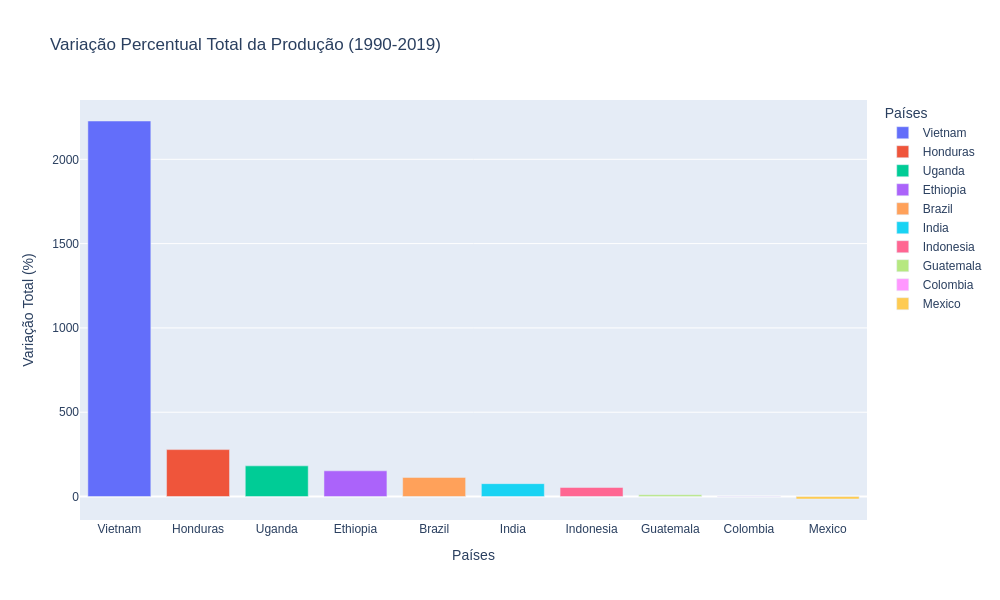

In [41]:
# função para calcular a formula da variacao
def formula_variacao_percentual(df, pais):
    df_pais = df[df['Country'] == pais].sort_values('Year')       # identifica cada pais por ano
    producao_inicial = df_pais['Production'].iloc[0]              # pega a primeira linha (1990) de cada pais
    producao_final = df_pais['Production'].iloc[-1]               # pega a ultima linha (2019) de cada pais

    return ((producao_final - producao_inicial) / producao_inicial) * 100 # a formula

# loop para criar um dataframe com os resultados acima
resultados = []
for pais in top_producers['Country'].unique():
    df_pais = top_producers[top_producers['Country'] == pais].sort_values('Year')
    producao_1990 = df_pais['Production'].iloc[0]
    producao_2019 = df_pais['Production'].iloc[-1]
    variacao = formula_variacao_percentual(top_producers, pais)
    resultados.append({
        'Country': pais,
        'Production_1990': producao_1990,
        'Production_2019': producao_2019,
        'Rate_%': variacao.round(2)})

# converter para DataFrame
df_variacao = pd.DataFrame(resultados).sort_values('Rate_%', ascending=False)

# visualização -- grafico de barras
fig_var = px.bar(
    df_variacao,
    x='Country',
    y='Rate_%',
    labels={"Country": "Países",             # rotulo do eixo x e legenda
            "Rate_%": "Variação Total (%)"}, # rotulo do eixo y
    title='Variação Percentual Total da Produção (1990-2019)',
    width=1000, height=600,
    color='Country')

fig_var.show()

In [42]:
print(f"Média da variação da produção dos páis produtores\n(excluindo o Vietnã, cujo crescimento extremo distorceria a análise): {df_variacao['Rate_%'].iloc[1:].mean().round(2)}%")

Média da variação da produção dos páis produtores
(excluindo o Vietnã, cujo crescimento extremo distorceria a análise): 94.36%


* **Visualização Geografica:**

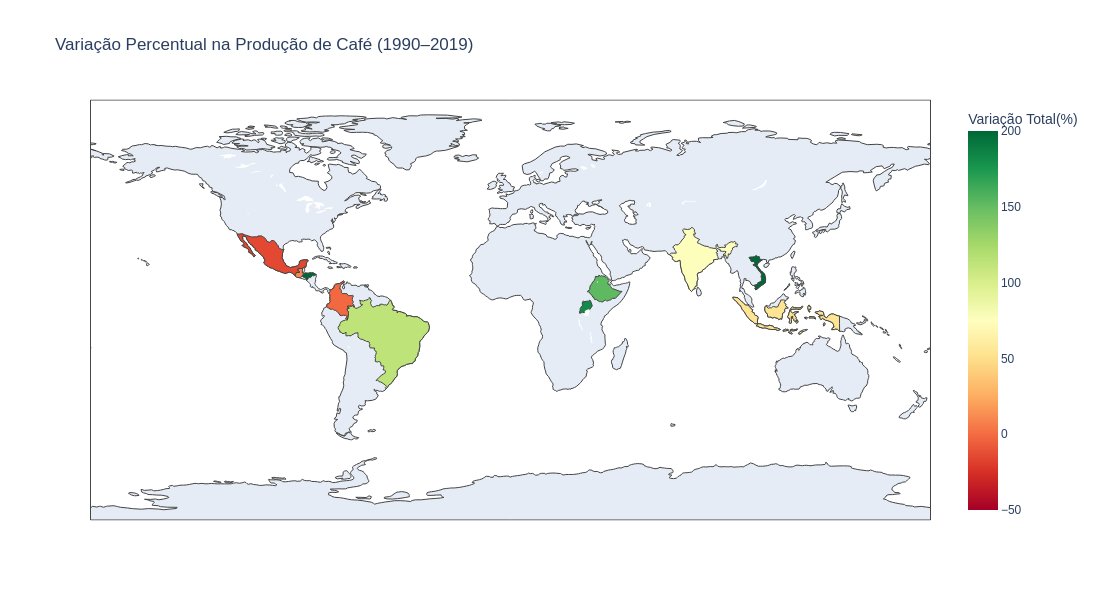

In [43]:
# Crie uma coluna "Tooltip" com a informação formatada
df_variacao["Tooltip"] = df_variacao["Rate_%"].map("{:.2f}%".format)

# visualização geografica
fig_var_map = px.choropleth(
    df_variacao,
    locations="Country",              # Nomes dos países (em inglês)
    locationmode="country names",     # Usa nomes padrão do Plotly
    color="Rate_%",                   # Dados para colorir o mapa
    hover_name="Country",             # Mostra nome ao passar o mouse
    labels={"Country": "País",              # rotulo do tooltip
            "Rate_%": "Variação Total(%)"}, # rotulo da legenda e tooltip
    hover_data={
        "Country": False,              # Remove duplicata
        "Rate_%": False,               # Oculta a coluna original
        "Tooltip": True},              # Mostra a coluna personalizada
    color_continuous_scale="RdYlGn",   # Escala de cores: Vermelho (-) -> Verde (+)
    range_color=(-50, 200),            # Limite da escala (ajuste conforme seus dados)
    title="Variação Percentual na Produção de Café (1990–2019)",
    width=1100,
    height=600,
)

# Ajuste o tooltip para HTML (permite formatação)
fig_var_map.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Variação: %{customdata[1]}%<extra></extra>")

fig_var_map.show()

# **Análise dos resultados -- insights**

➕ **Maiores crescimentos (variação positiva)**
> **Vietnã (2.227,25%)** teve um crescimento excepcional ao longo dos últimos 30 anos, possivelmente impulsionado por:
   * Incentivos governamentais para expansão agrícola.
   * Demanda internacional pelo café robusta *(mais resistente e com custo menor)*
   * Aumento dos preços no mercado global.

A Associação Vietnamita de Café e Cacau (VICOFA) destacou que, em 2024, o preço do robusta superou o do arábica pela primeira vez indicando a evolução do preço do café Robusta ao longo dos anos [(Vietnam Briefing, 2024)](https://www.vietnam-briefing.com/news/vietnam-coffee-market-a-deep-dive-into-its-consumers-challenges-and-prospects.html/).

> **Honduras, Uganda, Etiópia e Brasil** também tiveram crescimentos acima da média global de 94% *(excluindo o Vietnã, cujo crescimento extremo distorceria a análise)*.
* **Brasil**: Manteve a liderança em volume absoluto, mas com crescimento menor em % *(base já elevada em 1990)*.
* **Etiópia e Uganda**: Aumento impulsionado por investimentos em qualidade e nichos de mercado *(cafés especiais)*.

❌ **Maiores reduções (variações negativas)**
>**Colômbia (-2.06%)** e **México (-14.74%)** registraram quedas, possivelmente devido a:
* Mudanças climáticas *(secas, inundações, pragas)*.
* Preferência em priorizar outros cultivos *(o México é responsável por [39% das exportações de abacate](https://www.tradeimex.in/blogs/mexico-avocado-export-data-avocado-exports-by-country), logo pode vir a preferir a priorizar seus recursos na produção e exportação de abacate)*


-------------------


**B) Balança Comercial (Exportação vs. Importação)**

>**Objetivo:** analisar a balança comercial *(trade balance)* dos 5 maiores hubs da Europa ao longo destes 30 anos.
* *Como os países produtores não importam café, esta análise foca exclusivamente nos **hubs europeus de exportação**, pois apenas eles realizam operações simultâneas de importação e reexportação, ou seja, são os únicos com balança comercial relevante no setor.*

In [44]:
# convertendo a coluna Year para int64
coffee_reexport['Year'] = coffee_reexport['Year'].astype(int)

# merge do dataframe de re exportacao e exportacao :
df_balanca = pd.merge(
    coffee_reexport[['Country', 'Year', 'Continent','Re_Exported']],
    coffee_import[['Country', 'Year', 'Imported']],
    on=['Country','Year'],
    how='left'
)

# Merge com re_exp para adicionar a coluna 'Category'
df_balanca = pd.merge(
    df_balanca,
    re_exp[['Country', 'Category']],
    on=['Country'],
    how='left')

df_balanca = df_balanca[df_balanca['Category'] == 'Hub']

# calculo do balanço comercial ano a ano (imported - re_exported)
df_balanca['Trade_Balance'] = df_balanca['Imported'] - df_balanca['Re_Exported']

df_balanca.sort_values(by=['Year','Trade_Balance'], ascending=[True,False])
df_balanca

,Country,Year,Continent,Re_Exported,Imported,Category,Trade_Balance
0,Austria,1990,Europe,24900000,112800000,Hub,87900000
1,Belgium,1990,Europe,0,0,Hub,0
4,Bulgaria,1990,Europe,9960000,16080000,Hub,6120000
5,Croatia,1990,Europe,0,0,Hub,0
7,CZ,1990,Europe,0,39540000,Hub,39540000
...,...,...,...,...,...,...,...
1100,Slovenia,2019,Europe,24900000,37200000,Hub,12300000
1101,Spain,2019,Europe,166560000,359040000,Hub,192480000
1102,Sweden,2019,Europe,34740000,140880000,Hub,106140000
1106,Switzerland,2019,Europe,126840000,193680000,Hub,66840000


* Verificação se há valores nulos no dataframe

In [45]:
print(f"Valores NA:\n{df_balanca.isna().sum()}")

Valores NA:
Country          0
Year             0
Continent        0
Re_Exported      0
Imported         0
Category         0
Trade_Balance    0
dtype: int64


* Filtrando apenas os 6 maiores hubs de exportação

In [46]:
# selecionando apenas os 6 maiores hubs
top_hubs = (df_balanca.groupby(['Country'])['Trade_Balance']
            .sum()
            .reset_index()
            .sort_values(by='Trade_Balance', ascending=False)
            .head(6))

top_hubs = top_hubs['Country'].tolist()
top_hubs


['Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Netherlands']

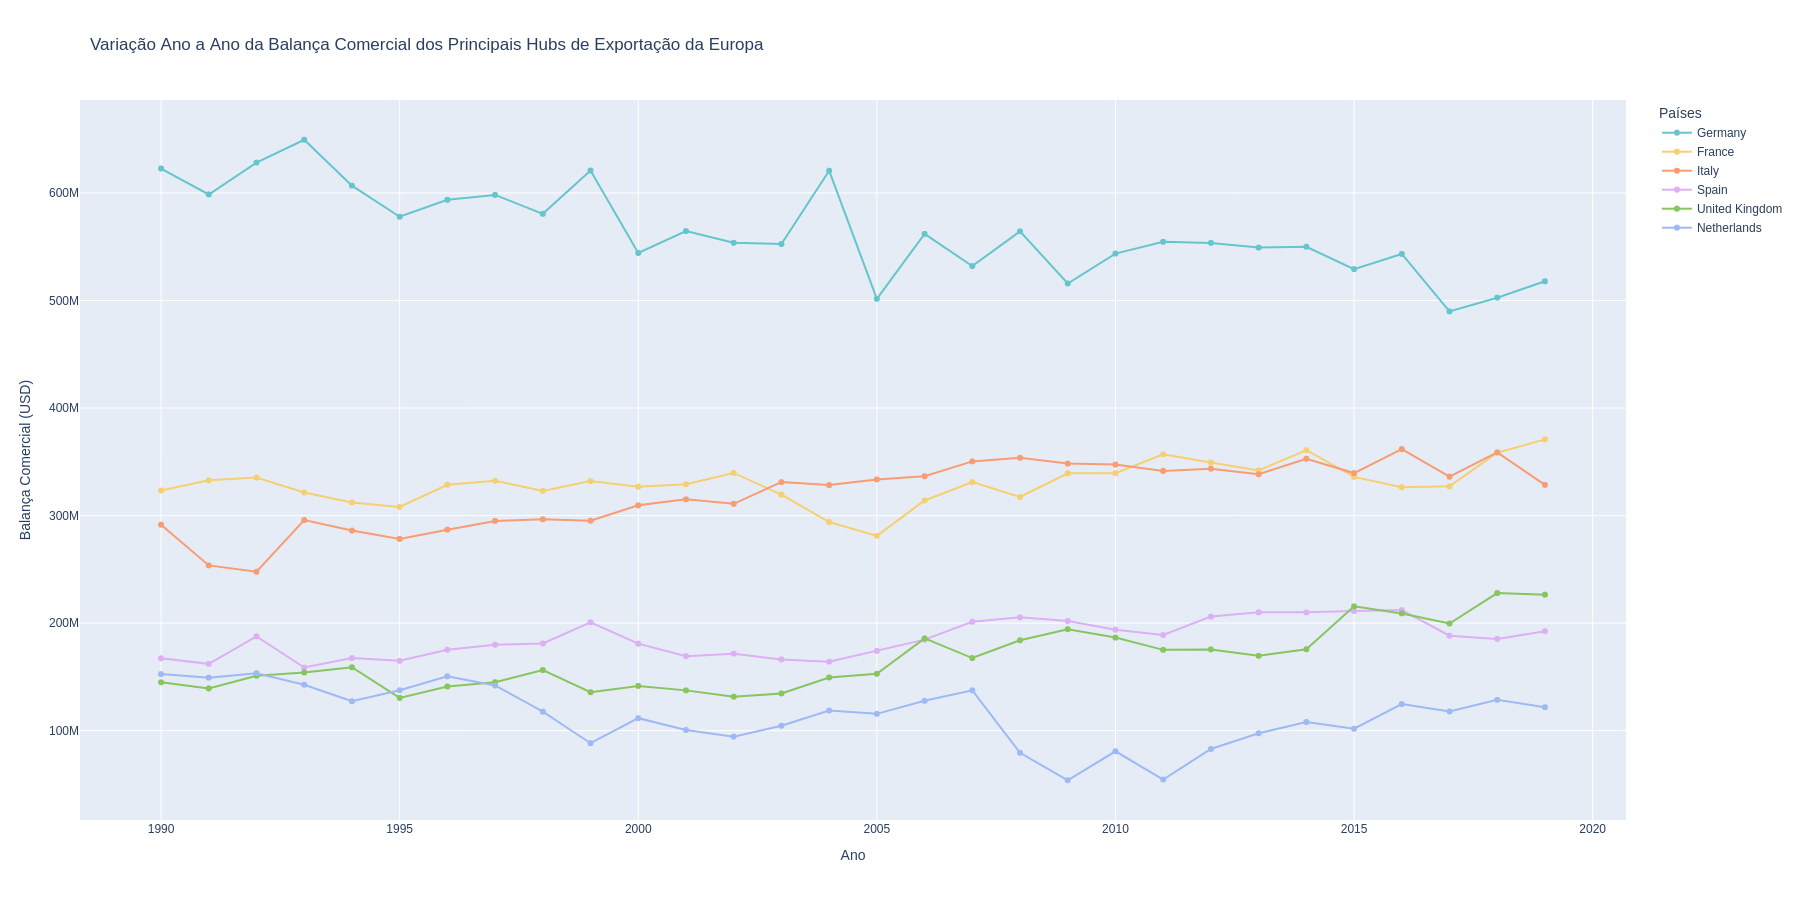

In [47]:
# orderando o dataframe por ano:
df_balanca = df_balanca.sort_values('Year')

# Filtrando df_balanca apenas com os top5 hubs
df_balanca = df_balanca[df_balanca['Country'].isin(top_hubs)]

# evolucao anual -- grafico de linhas
fig_balanca = px.line(
              df_balanca.sort_values('Year'),  # garantir ordem cronológica
              x='Year',
              y='Trade_Balance',
              labels={"Year": "Ano",
                     "Trade_Balance": "Balança Comercial (USD)",
                     "Country" : "Países"},
              title='Variação Ano a Ano da Balança Comercial dos Principais Hubs de Exportação da Europa',
              category_orders={"Country": top_hubs},  # ordem da legenda dos maiores hubs
              color='Country',
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=1800, height=900,
              line_shape='linear',
              markers=True)

fig_balanca.show()


* Analisar a diferença*(variação)* do volume de reexportação dos Hubs no início de suas atividades em 1990 e em 2019, ultimo ano analisado.

In [48]:
# função para calcular a formula da taxa de variacao
def variacao_percentual_hubs(df, pais):
    df_pais = df[df['Country'] == pais].sort_values('Year')   # identifica cada pais por ano
    exp_inicial = df_pais['Re_Exported'].iloc[0]              # pega a primeira linha (1990) de cada pais
    exp_final = df_pais['Re_Exported'].iloc[-1]               # pega a ultima linha (2019) de cada pais

    return ((exp_final - exp_inicial) / exp_inicial) * 100 # a formula

# loop para criar um dataframe com os resultados acima
resultados = []
for pais in top_hubs:
    df_pais = df_balanca[df_balanca['Country'] == pais].sort_values('Year')
    exp_1990 = df_pais['Re_Exported'].iloc[0]
    exp_2019 = df_pais['Re_Exported'].iloc[-1]
    variacao = variacao_percentual_hubs(df_balanca, pais)
    resultados.append({
        'Country': pais,
        'Exp_1990': exp_1990,
        'Exp_2019': exp_2019,
        'Rate_%': variacao.round(0)})

# converter para DataFrame
df_var_hub = pd.DataFrame(resultados).sort_values('Rate_%', ascending=False)

df_var_hub

,Country,Exp_1990,Exp_2019,Rate_%
2,Italy,22980000,326280000,1320.0
3,Spain,15900000,166560000,948.0
5,Netherlands,35100000,199440000,468.0
0,Germany,197520000,828060000,319.0
4,United Kingdom,28920000,106800000,269.0
1,France,54780000,108720000,98.0


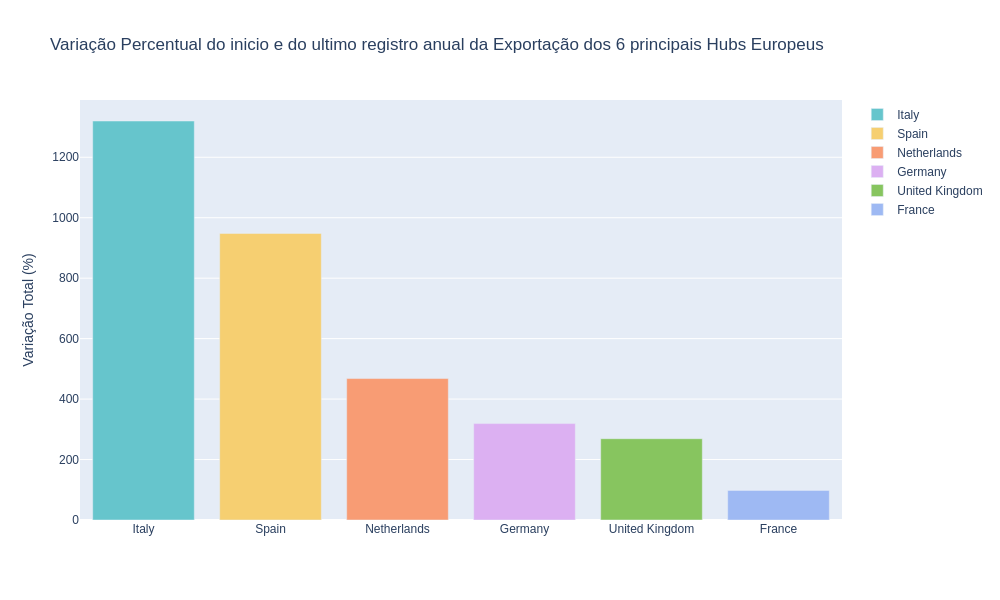


Média Geral da Variação Percentual dos 5 maiores hubs da Europa: 570.33%


In [49]:
# visualizacao -- grafico de barras:
fig_var_hub = px.bar(
    df_var_hub,
    x='Country',
    y='Rate_%',
    labels={"Country": "", # rotulo do eixo x e legenda
            "Exp_1990" : "Exportação de 1990 (USD)",
            "Exp_2019" : "Exportação de 2019 (USD)",
            "Rate_%" : "Variação Total (%)"}, # rotulo do eixo y
    title='Variação Percentual do inicio e do ultimo registro anual da Exportação dos 6 principais Hubs Europeus',
    width=1000, height=600,
    color='Country',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data=['Exp_1990', 'Exp_2019'])

fig_var_hub.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do país
                 "Exportação de 1990: %{customdata[0]:,.0f}<br>" +  # Formatação personalizada
                 "Exportação de 2019: %{customdata[1]:,.0f}<br>" +
                 "Variação: %{y}%<br>",
    customdata=df_var_hub[['Exp_1990', 'Exp_2019']]  # Dados originais
)

fig_var_hub.show()

print(f"\nMédia Geral da Variação Percentual dos 5 maiores hubs da Europa: {df_var_hub['Rate_%'].mean().round(2)}%")

# **Análise dos Resultados -- insights**

> **Italia e Espanha** *(acima da média)*
* A **Itália** cresceu 1.320% (de **22,9M** para **326M**) e a **Espanha** cresceu **947,55%** (de **15,9M** para **166M**) liderando o crescimento de diferença entre exportação **incial (1990)** e **final (2019)**.
* A **Itália** consolida sua posição, ainda mais, como referência global no preparo de espresso e na cultura cafeeira, enquanto a **Espanha** se destaca como um dos maiores consumidores de café da Europa.
* Além disso, o café está presente em momentos importantes e cotidianos. Como o [Guia da Itália](https://guiadaitalia.com/cultura-do-cafe-na-italia/) e a empresa cafeeira espanhola [Cafegrà](https://www.cafegra.com/es/los-espanoles-tomamos-una-media-de-4-cafes-al-dia/) descreveram que, em **ambos países**, ele é servido em celebrações, reuniões familiares e até em negócios, como um gesto de carinho e hospitalidade.


> **Países Baixos** *(abaixo da média)*
* Teve um notório crescimento de **468%** (de **35M** para **199M**) mesmo estando abaixo da média geral e se consolidou como um dos principais porta de entrada do café do continente.

> **Alemanha** *(abaixo da média)*
* Em termos absolutos, a **Alemanha** adicionou **631M** (de **197M** para **828M**) em reexportações, enquanto a **Itália** adicionou **303M**. Ou seja, a **Alemanha** ainda é o maior hub em volume, mesmo com crescimento percentual menor.


> **Reino Unido** *(abaixo da média)*
* Com aumento de **269%** (de **28M** para **106,8M**) nas exportações, observa-se um crescimento sólido, mas conservador, bem abaixo de outros hubs como **Itália** e **Espanha**.
* Possivelmente explicado pela forte cultura de chá em detrimento ao consumo do café como notamos em países produtores como também a **Itália** e **Espanha**.

> **França** *(abaixo da média)*
* Menor variação entre os países analisados (**98%**), com um crescimento modesto (de **54,7M** para **108,7M**). A explicação pode estar na priorização do consumo interno sobre exportação dada sua cultura de cafeterias/bistrôs do país.
* Isto é, enquanto a **Itália**  e a **Espanha** cresceram exportando volume, **França** pode estar privilegiando em apenas desgustar um café de qualidade.

--------------------
**C) Participação de mercado dos hubs dentro da Europa *(% do total europeu em 1990 vs. 2019)***

> **Objetivo:** identificar quais países mantiveram e/ou ganharam e quais perderam espaço ao comparar a distribução do *marketshare* em 1990 e em 2019.

In [50]:
# copiar dataframe balanca
df_market_share = df_balanca.copy()

# total em 1990 e em 2019
total_1990 = df_market_share[df_market_share['Year'] == 1990]['Re_Exported'].sum()
total_2019 = df_market_share[df_market_share['Year'] == 2019]['Re_Exported'].sum()

# percentual de participação de mercado de cada um dos seis principais hubs em 1990 e 2019
df_market_share['Share_1990'] = (df_market_share['Re_Exported'] / total_1990) * 100
df_market_share['Share_2019'] = (df_market_share['Re_Exported'] / total_2019) * 100



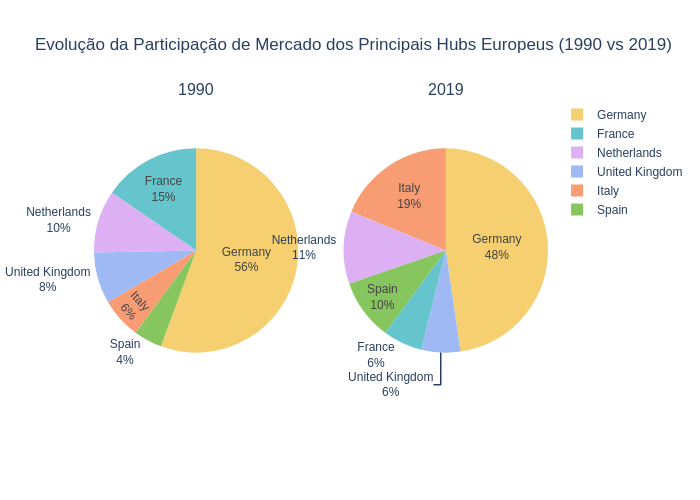

In [51]:
# visualização -- grafico de pizza
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# order o dataframe por paises
df_market_share = df_market_share.sort_values('Country')

fig_mk_1990 = px.pie(
    df_market_share[df_market_share['Year'] == 1990],
    names='Country',
    values='Share_1990',
    labels={"Country": "País"},
    hover_data=['Share_1990'],
    color='Country',
    color_discrete_sequence=px.colors.qualitative.Pastel)

# formatacao do tooltip e como vai ficar escrito em cada fatia
fig_mk_1990.update_traces(
    textinfo="percent+label",  # Mostra % e nome do país
    texttemplate='%{label}<br>%{percent:.0%}',
    hovertemplate="<b>%{label}</b><br>Participação: %{percent:.0%}")

fig_mk_2019 = px.pie(
    df_market_share[df_market_share['Year'] == 2019],
    names='Country',
    values='Share_2019',
    labels={"Country": "País"},
    hover_data=['Share_2019'],
    color='Country',
    color_discrete_sequence=px.colors.qualitative.Pastel)

fig_mk_2019.update_traces(
    textinfo="percent+label",  # Mostra % e nome do país
    texttemplate='%{label}<br>%{percent:.0%}',
    hovertemplate="<b>%{label}</b><br>Participação: %{percent:.0%}")

# Combinar em subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=('1990', '2019'))

fig.add_trace(fig_mk_1990.data[0], row=1, col=1)
fig.add_trace(fig_mk_2019.data[0], row=1, col=2)

fig.update_layout(title_text="Evolução da Participação de Mercado dos Principais Hubs Europeus (1990 vs 2019)")
fig.show()

# **Análise da evolução da participação de mercado *(marketshare)* da Europa -- *insights***

➕ **Mantiveram/Ganharam espaço:**
>A evolução do *marketshare* dos hubs europeus reforça a **hegemonia da Alemanha** mesmo com **perda de 8%** do mercado, que caiu de **56% em 1990** para **48% em 2019**.

>A **Itália**, por sua vez, consolidou sua presença no mercado saindo de **6% em 1990** chegando a **19%** em 2019. Portanto, ao conquistar **13% de *marketshare***, tornou-se a **segunda maior participante do mercado** em 2019, ficando atrás apenas da **Alemanha**.

> A **Espanha** ampliou de forma muito positiva sua participação no mercado evoluindo de **4% em 1990** para **10% em 2019**.

> Os **Países Baixos** ampliaram sua influência no período de forma **discreta** avançando de **10% em 1990** para **11% em 2019**.

❌ **Perderam espaço:**
> Seguindo a direção oposta da **Itália**, a **França** registrou uma **expressiva perda** na participação de mercado desde **1990** que recuou de **15%** para apenas **6% em 2019**.

> O **Reino Unido** registrou uma leve **perda de 2%** marketshare saindo dos **inicias 8%** para **6% em 2019**.

-------------------

# **Considerações Finais do Projeto**

Este projeto analisou a **dinâmica global do café**, destacando padrões de produção, consumo e comércio internacional. Os **principais insights** revelam **estratégias distintas entre os países**:

> **Produtores** como **Colômbia** e **Vietnã** focam na **exportação em larga escala** (**acima de 90%**), enquanto **Brasil e Etiópia** equilibram mercado interno e externo, mantendo **parte significativa de sua produção para consumo doméstico**.

> **Hubs europeus**, como **Alemanha e Bélgica**, atuam como intermediários, **reexportando café** com diferentes enfoques: **Alemanha** prioriza volume, e **Bélgica** logística.

> **Países consumidores** (**EUA, Japão, Rússia**) **dependem totalmente de importações**, ficando expostos a variações de preço e oferta.

> O **crescimento excepcional** do **Vietnã** contrasta com **quedas em Colômbia e México**, influenciadas possivelmente por fatores climáticos e mudanças agrícolas. Na Europa, **Itália e Espanha** **expandiram sua participação no mercado**, enquanto **França e Reino Unido** **perderam espaço**, refletindo diferenças culturais e estratégicas.



No entanto, um dos **insights mais relevantes** diz respeito às **oportunidades estratégicas** para o **Brasil**. Como o **maior produtor mundial** e dada às atuais condições geopoliticas, o **Brasil** está em um **momento único para expandir suas exportações**, tanto para a Europa (**via Acordo Mercosul-UE**) quanto para os **EUA** (**via tarifas menores que os concorrentes, como o Vietnã**).

Caso o pacote de tarifas norte-americanas se consolide há uma grande **possibilidade do Acordo Mercosul-UE ser finalmente assinado**. Com isso, o **Brasil** poderá aproveitar este acordo para a**umentar vendas para hubs como Bélgica e Alemanha**. Além disso, terá oportunidade de **explorar a vantagem tarifária** de ter sido taxado apenas em 10% pelos EUA, **ganhando espaço do Vietnã**, taxado em 46%, **no mercado norte-americano**.

Portanto, se o **Brasil** agir **de forma estratégica**, além de diversificar mercados e reduzir a dependência em um único bloco econômico, poderá não apenas **manter sua liderança**, mas também **aumentar seu lucro** e **influência no comércio global de café**.